In [1]:
!pip install pmdarima --no-binary :all:

In [2]:
import pandas as pd
import io

# Para cargar el archivo CSV en Google Colab.
# Asegúrate de que el nombre del archivo coincida exactamente.
# Si el archivo está en una carpeta específica, ajusta la ruta.
try:
    # Asumiendo que el archivo está en la raíz del explorador de archivos de Colab
    df = pd.read_csv('df_seleccion_especifica.csv')

    # Seleccionar las columnas 'region' y 'type'
    # y luego obtener las combinaciones únicas
    unique_region_type = df[['region', 'type']].drop_duplicates()

    # Mostrar las combinaciones únicas
    print("Combinaciones únicas de región y tipo:")
    print(unique_region_type)

except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    print("Por favor, asegúrate de que el archivo está subido a Google Colab y el nombre es correcto.")
except KeyError:
    print("Error: Una o ambas columnas ('region', 'type') no se encontraron en el archivo CSV.")
    print("Por favor, verifica los nombres de las columnas en tu archivo.")
except Exception as e:
    print(f"Ocurrió un error inesperado: {e}")

Combinaciones únicas de región y tipo:
           region          type
0      California  conventional
85     California       organic
170       Chicago  conventional
255       Chicago       organic
340     Nashville  conventional
425  Philadelphia       organic
510       Roanoke       organic


In [3]:
df.head()

,type,region,Clasificación,Date,AveragePrice,Total Volume,Geo_Group,year,WeekOfYear,Lag_26_Total_Volume,Lag_1_AveragePrice,Near_SuperBowl,Near_CincoDeMayo,Near_July4th,Near_Thanksgiving,Near_ChristmasNewYear
0,conventional,California,West,2015-01-11,0.925,5901133.620,West,2015,2,NaN,NaN,0,0,0,0,0
1,conventional,California,West,2015-01-25,1.040,5250399.760,West,2015,4,NaN,0.925,1,0,0,0,0
2,conventional,California,West,2015-02-08,0.880,6877184.025,West,2015,6,NaN,1.040,1,0,0,0,0
3,conventional,California,West,2015-02-22,0.960,5825908.125,West,2015,8,NaN,0.880,0,0,0,0,0
4,conventional,California,West,2015-03-08,0.900,6345189.070,West,2015,10,NaN,0.960,0,0,0,0,0


Se procesarán 7 combinaciones únicas de region-tipo.

--- Procesando: Región 'California' - Tipo 'conventional' ---

Métricas para el conjunto de prueba de interpolación (datos < 2018):
  RMSE: 1233797.30
  R^2: -1.13


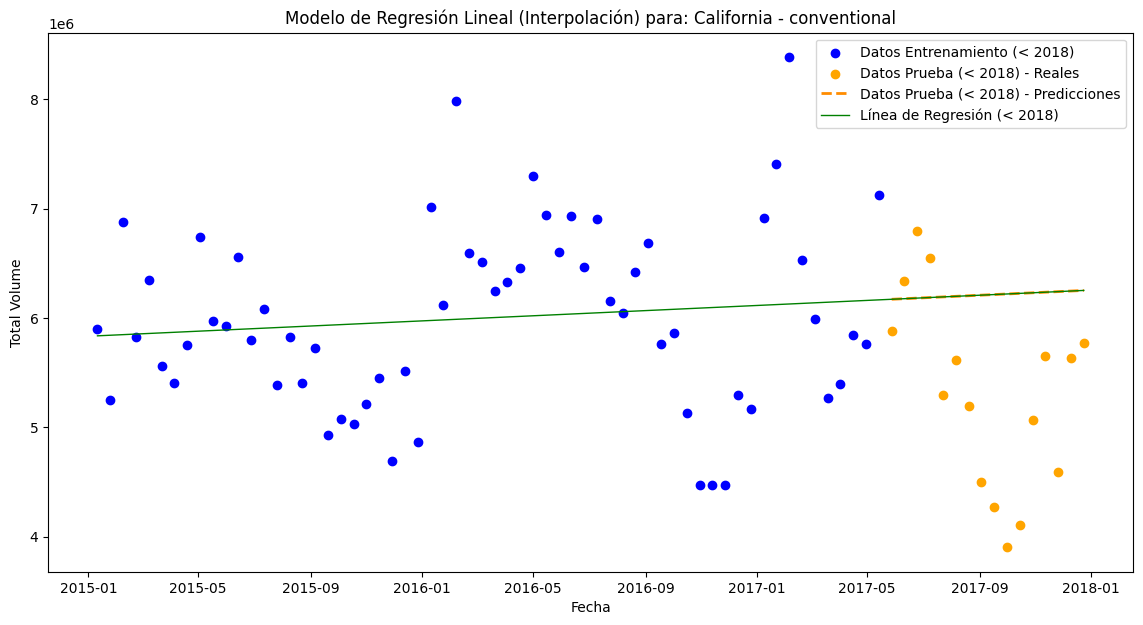


Métricas para el conjunto de extrapolación (datos de 2018):
  RMSE: 360318.33
  R^2: -2.43


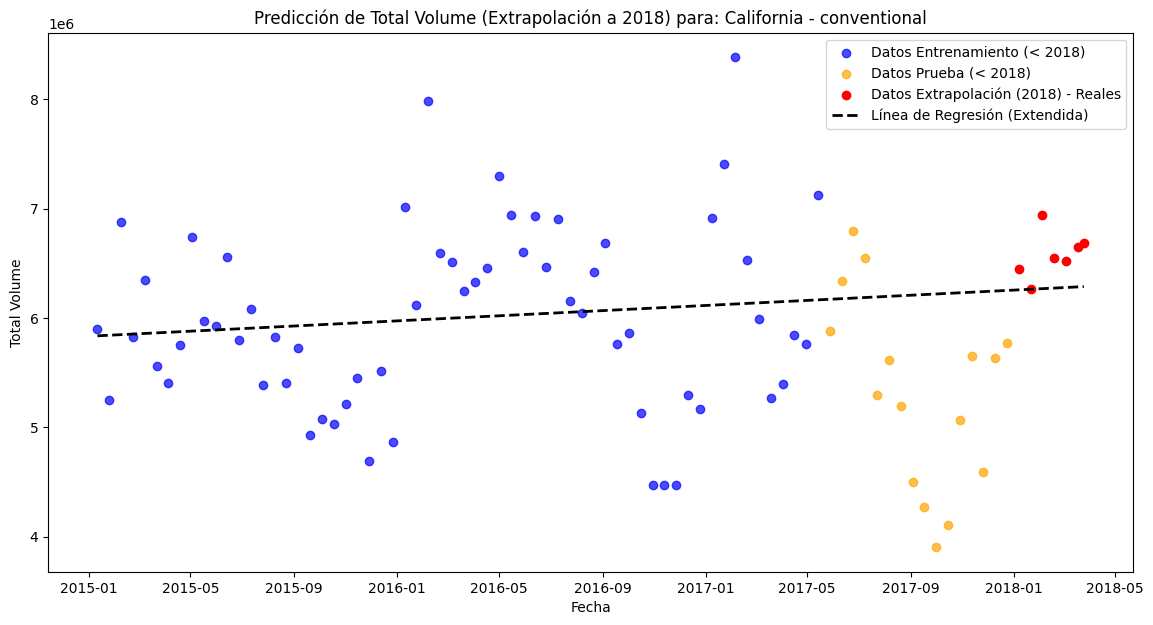



--- Procesando: Región 'California' - Tipo 'organic' ---

Métricas para el conjunto de prueba de interpolación (datos < 2018):
  RMSE: 55819.19
  R^2: -4.42


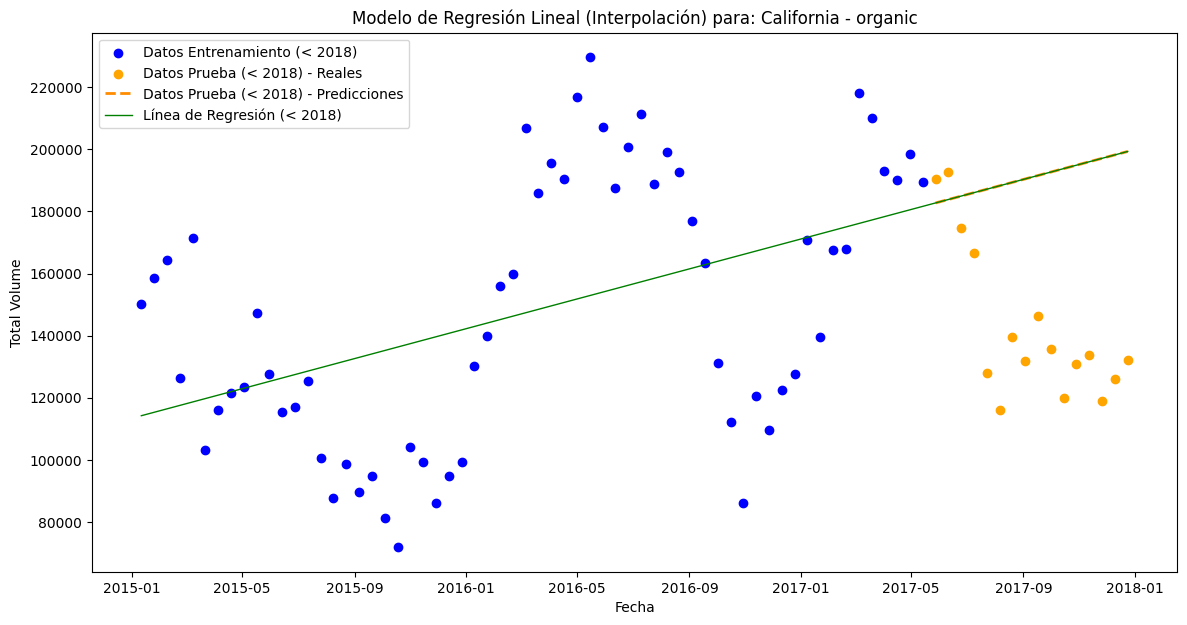


Métricas para el conjunto de extrapolación (datos de 2018):
  RMSE: 24165.40
  R^2: -0.39


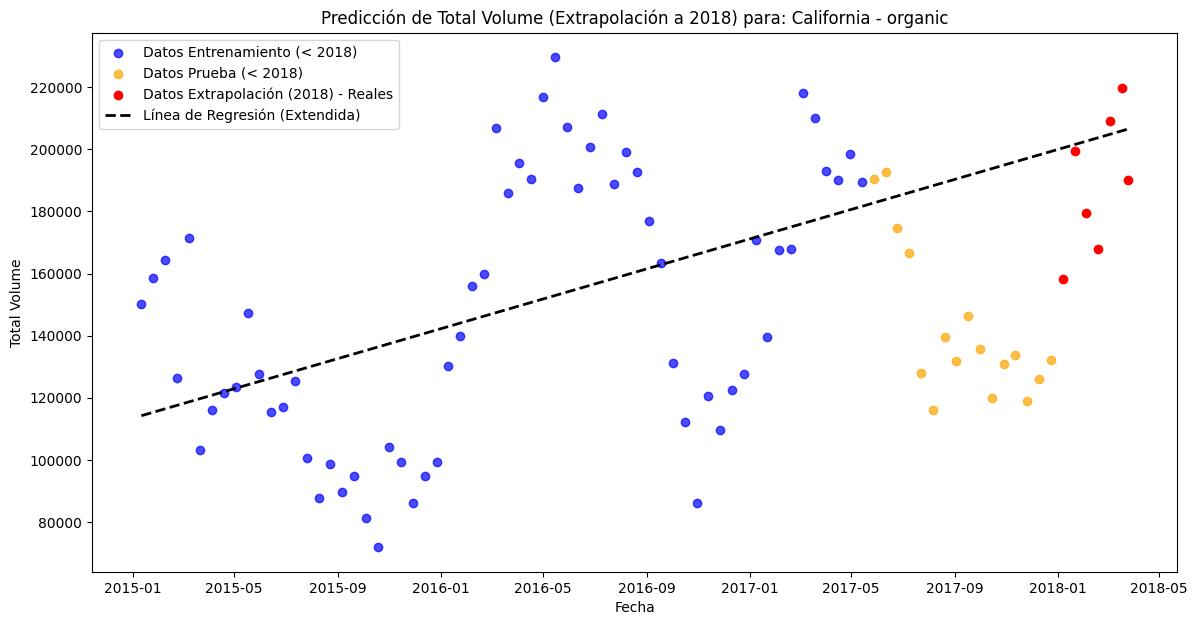



--- Procesando: Región 'Chicago' - Tipo 'conventional' ---

Métricas para el conjunto de prueba de interpolación (datos < 2018):
  RMSE: 123418.86
  R^2: 0.08


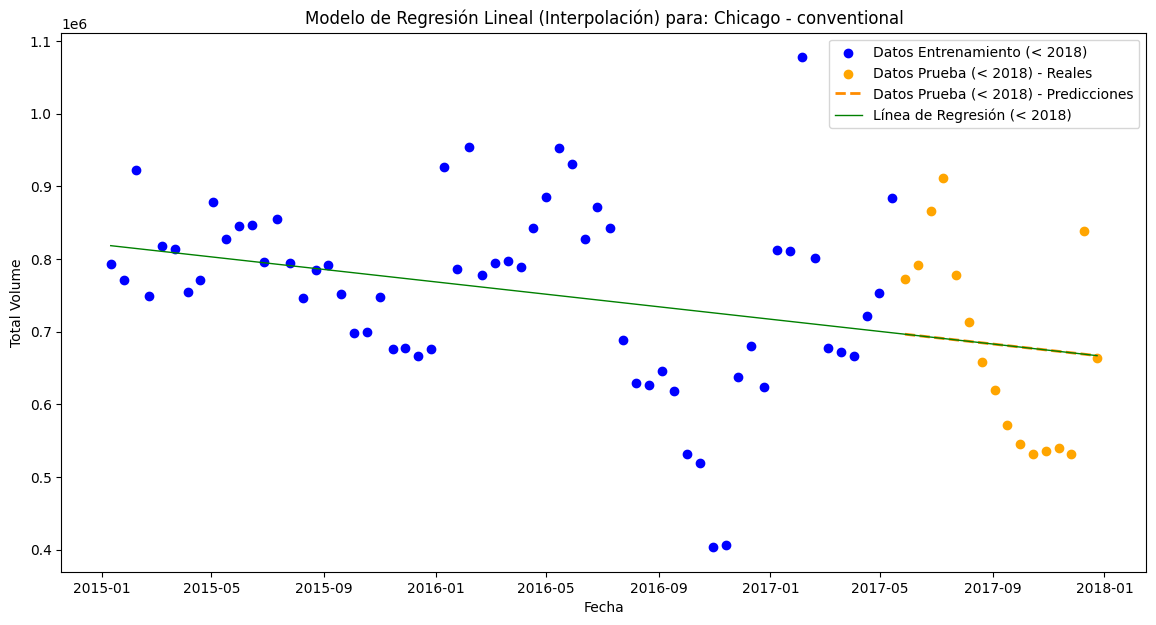


Métricas para el conjunto de extrapolación (datos de 2018):
  RMSE: 281156.75
  R^2: -4.48


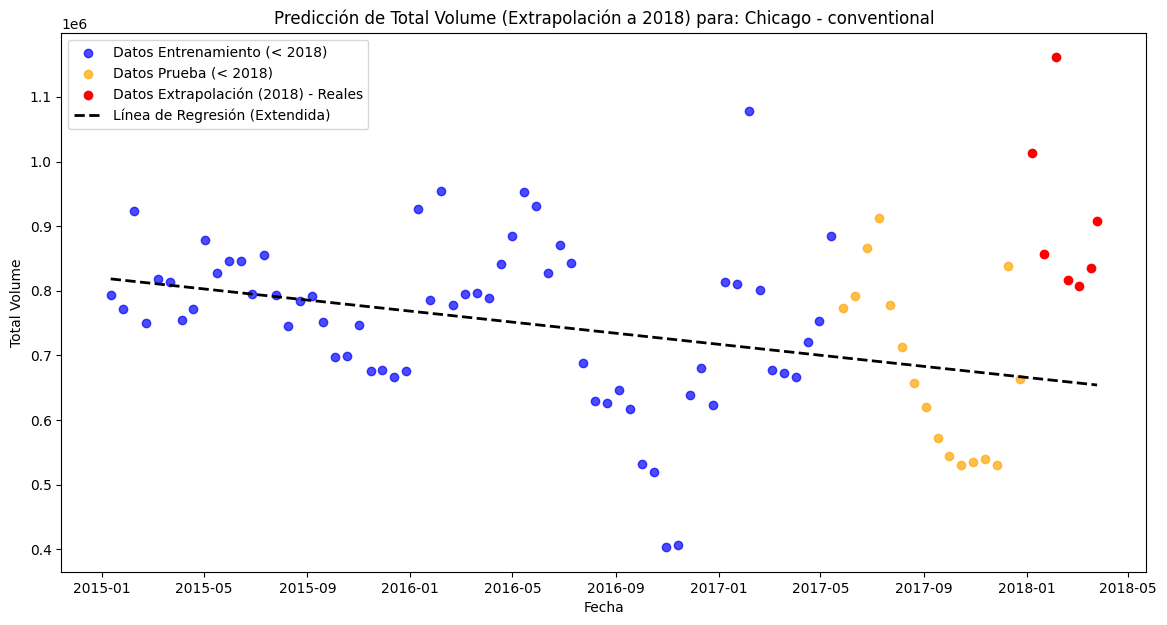



--- Procesando: Región 'Chicago' - Tipo 'organic' ---

Métricas para el conjunto de prueba de interpolación (datos < 2018):
  RMSE: 14321.06
  R^2: -2.33


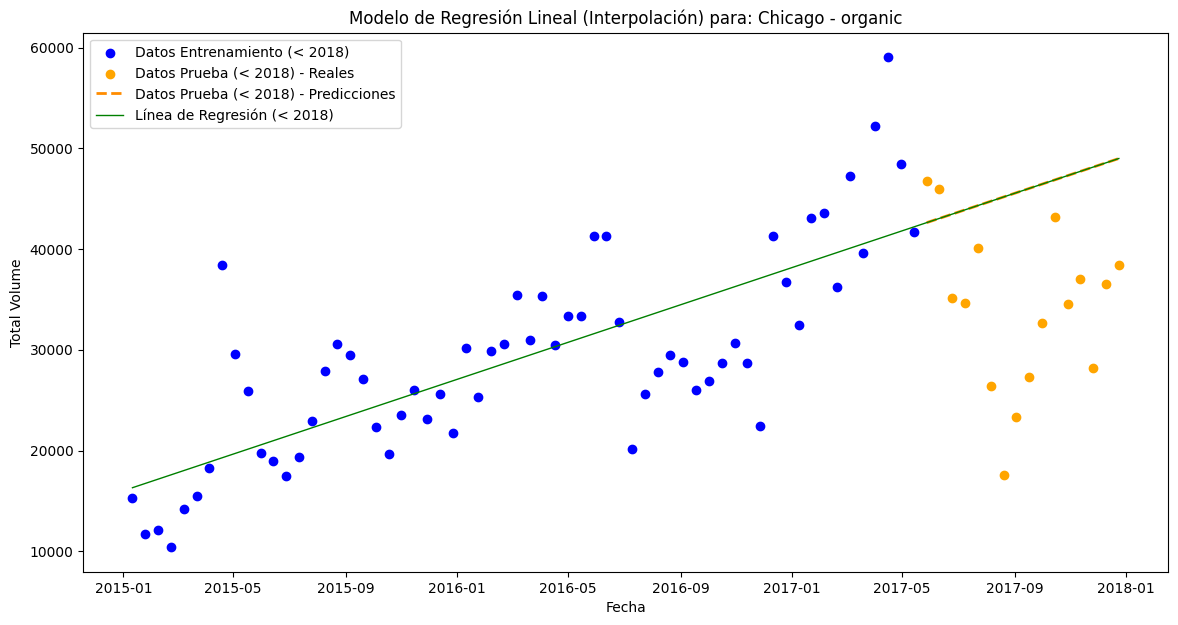


Métricas para el conjunto de extrapolación (datos de 2018):
  RMSE: 12658.01
  R^2: -12.69


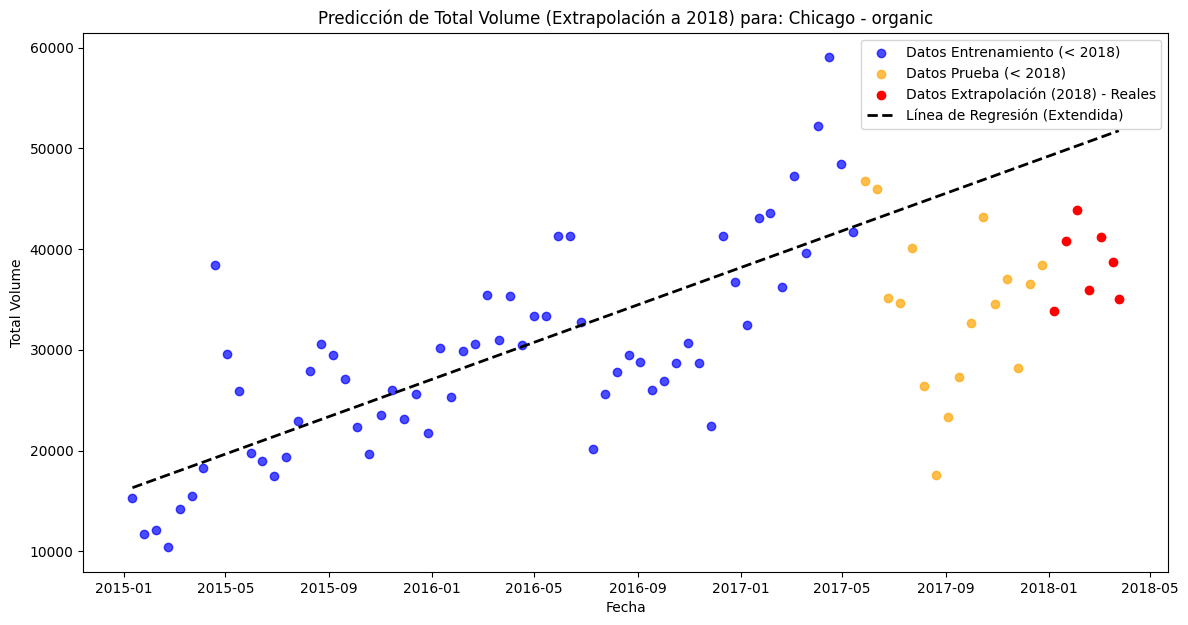



--- Procesando: Región 'Nashville' - Tipo 'conventional' ---

Métricas para el conjunto de prueba de interpolación (datos < 2018):
  RMSE: 58911.04
  R^2: -1.05


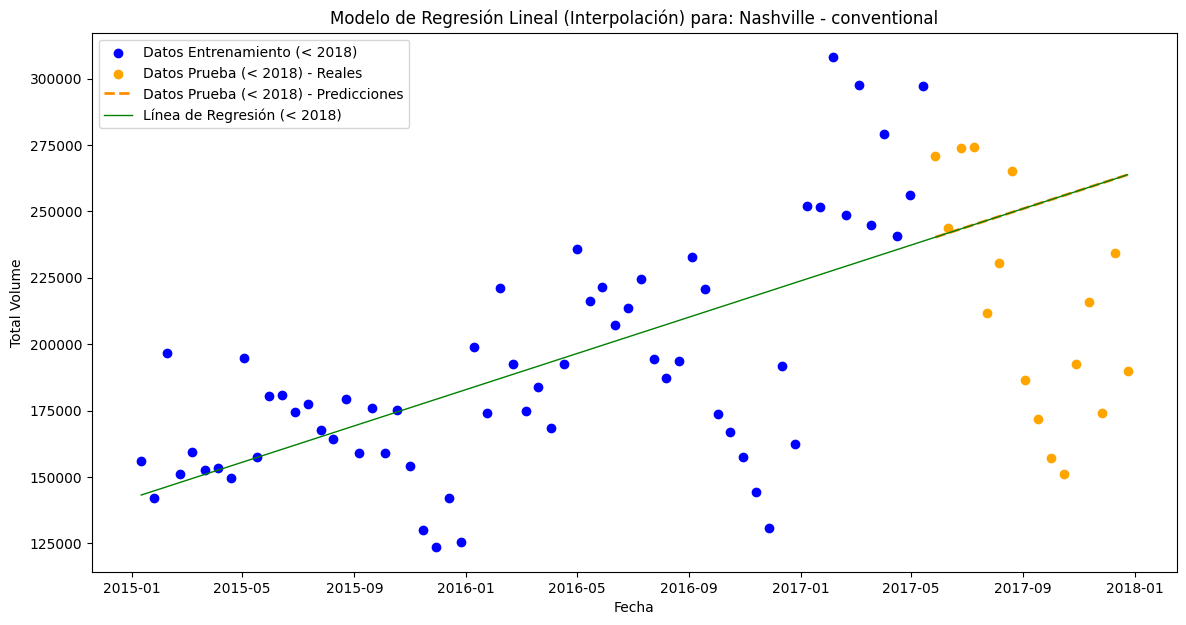


Métricas para el conjunto de extrapolación (datos de 2018):
  RMSE: 28228.61
  R^2: -0.33


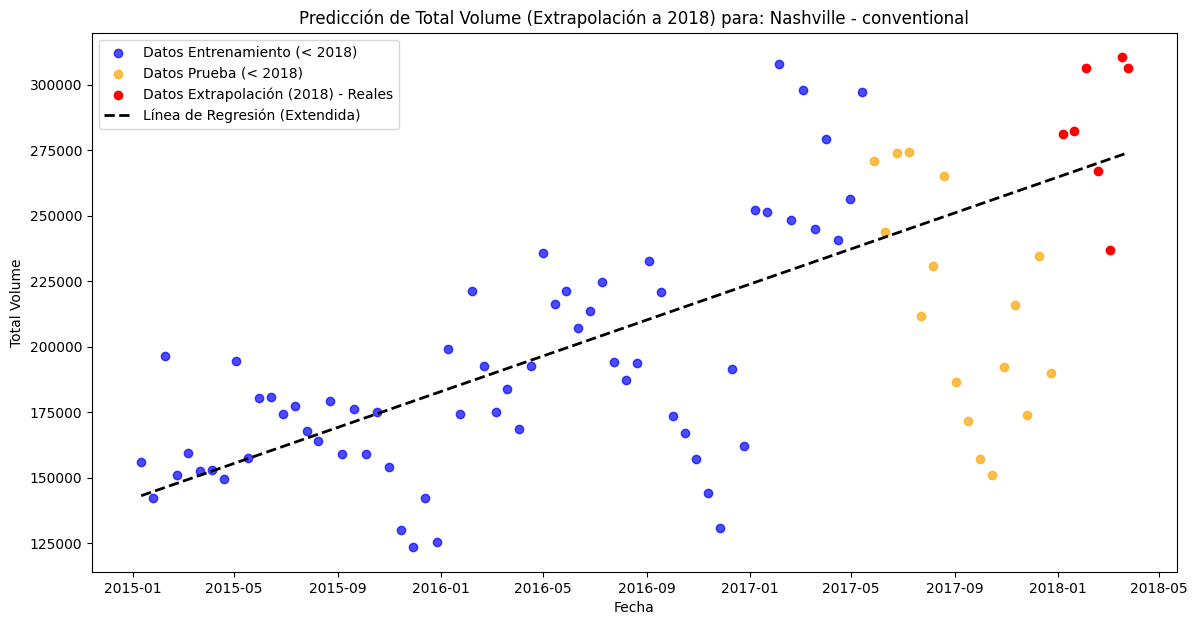



--- Procesando: Región 'Philadelphia' - Tipo 'organic' ---

Métricas para el conjunto de prueba de interpolación (datos < 2018):
  RMSE: 8230.82
  R^2: -0.89


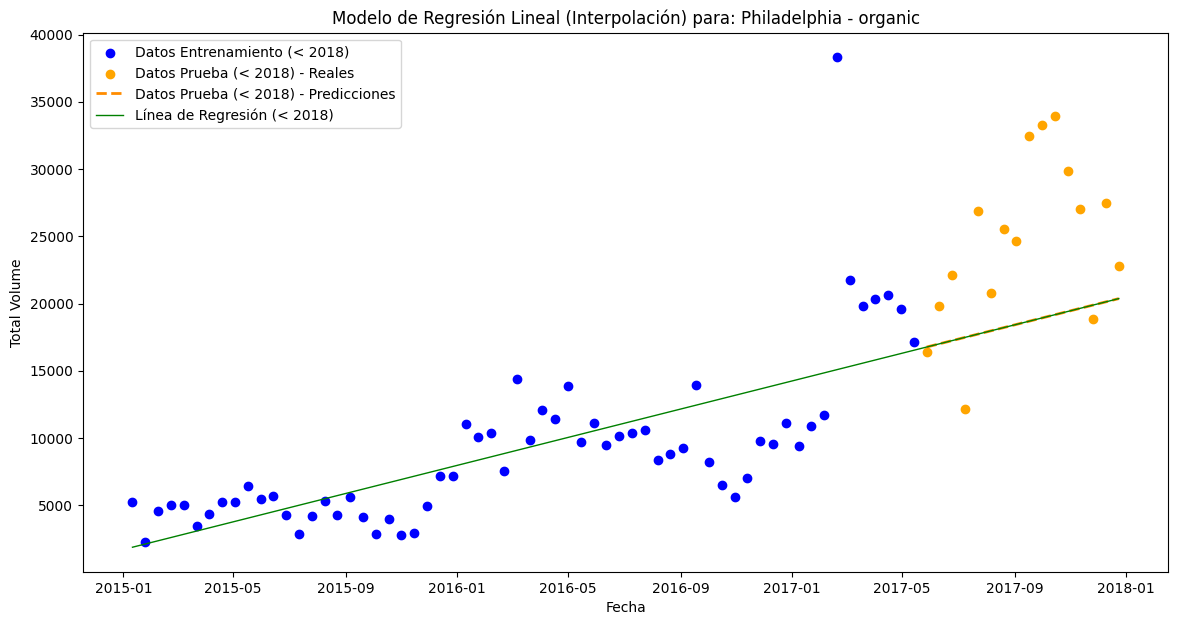


Métricas para el conjunto de extrapolación (datos de 2018):
  RMSE: 13891.52
  R^2: -2.53


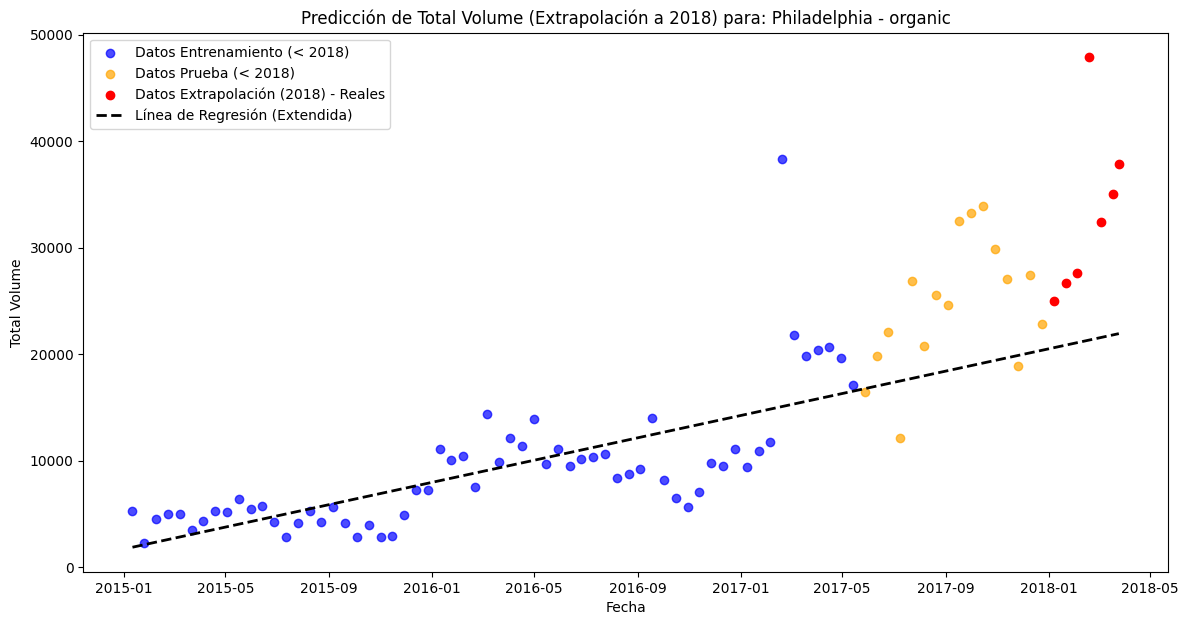



--- Procesando: Región 'Roanoke' - Tipo 'organic' ---

Métricas para el conjunto de prueba de interpolación (datos < 2018):
  RMSE: 1894.39
  R^2: -1.96


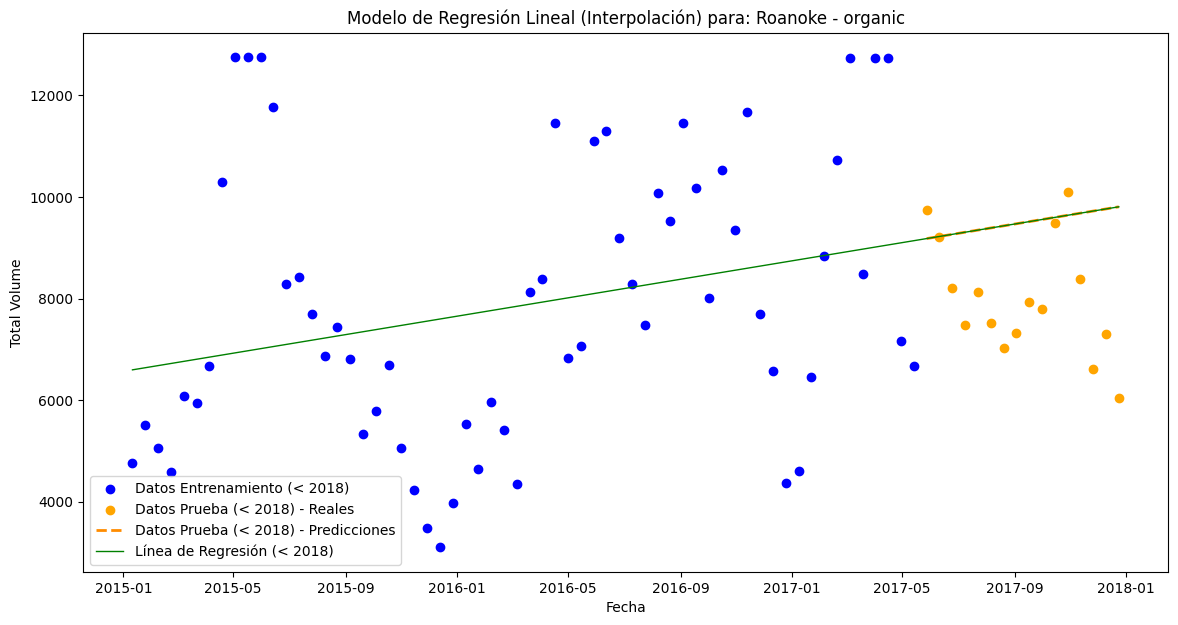


Métricas para el conjunto de extrapolación (datos de 2018):
  RMSE: 1695.81
  R^2: -8.87


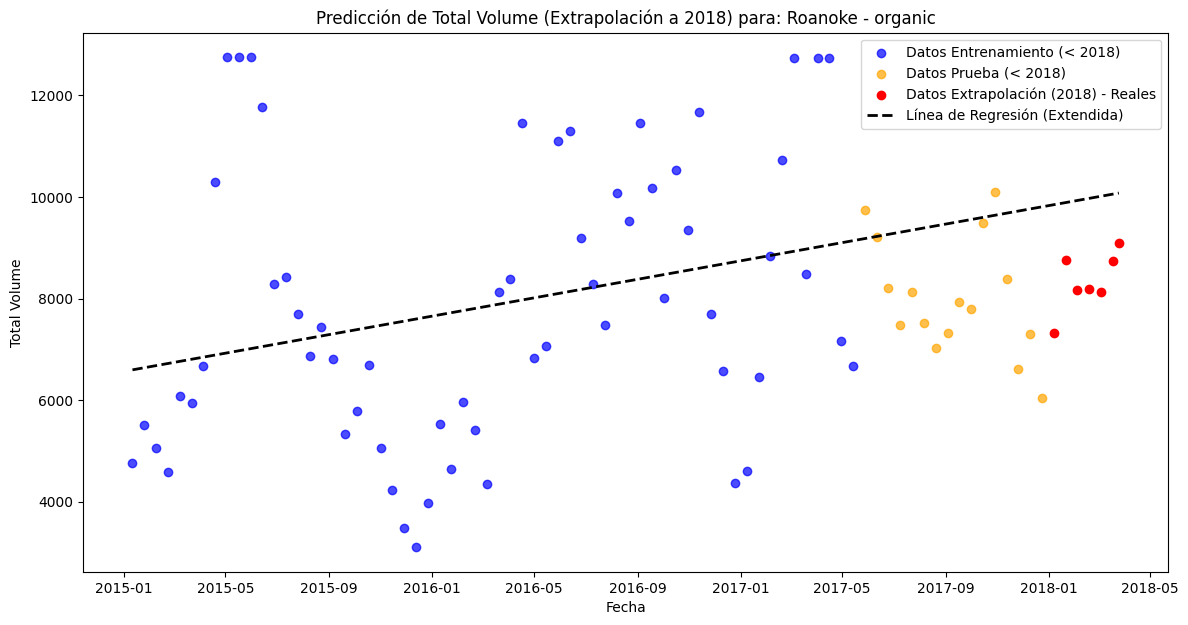



Proceso completado.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import datetime as dt

# Cargar el dataset
try:
    df = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    print("Por favor, asegúrate de que el archivo está subido a Google Colab y el nombre es correcto.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# Preprocesamiento de datos
try:
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year
    df['DateOrdinal'] = df['Date'].map(dt.datetime.toordinal)
except KeyError as e:
    print(f"Error: La columna {e} no se encontró. Verifica los nombres de las columnas en tu CSV.")
    exit()
except Exception as e:
    print(f"Ocurrió un error durante el preprocesamiento de fechas: {e}")
    exit()

required_columns = ['region', 'type', 'Total Volume', 'Date']
for col in required_columns:
    if col not in df.columns:
        print(f"Error: La columna requerida '{col}' no existe en el DataFrame. Por favor, verifica tu archivo CSV.")
        exit()

unique_combinations = df[['region', 'type']].drop_duplicates()

print(f"Se procesarán {len(unique_combinations)} combinaciones únicas de region-tipo.\n")

for index, row in unique_combinations.iterrows():
    region_val = row['region']
    type_val = row['type']

    print(f"--- Procesando: Región '{region_val}' - Tipo '{type_val}' ---")

    df_subset = df[(df['region'] == region_val) & (df['type'] == type_val)].sort_values(by='Date')

    if df_subset.empty:
        print("No hay datos para esta combinación.\n")
        continue

    extrapolation_data = df_subset[df_subset['year'] == 2018]
    interpolation_data = df_subset[df_subset['year'] < 2018]

    if interpolation_data.empty:
        print("No hay datos anteriores a 2018 para entrenar el modelo para esta combinación.")
        if not extrapolation_data.empty:
            print("Datos de 2018 existen pero no se pueden usar para validar un modelo no entrenado.")
            # Mostrar datos de extrapolación si existen, aunque no haya modelo
            plt.figure(figsize=(12, 6))
            plt.scatter(extrapolation_data['Date'], extrapolation_data['Total Volume'], color='red', label='Datos 2018 (Extrapolación) - Reales')
            plt.title(f'Datos 2018 (sin modelo): {region_val} - {type_val}')
            plt.xlabel('Fecha')
            plt.ylabel('Total Volume')
            plt.legend()
            plt.show()
        print("\n")
        continue

    X_interp = interpolation_data['DateOrdinal'].values.reshape(-1, 1)
    y_interp = interpolation_data['Total Volume'].values

    if len(X_interp) < 2:
        print(f"No hay suficientes datos de interpolación ({len(X_interp)}) para entrenar/probar para esta combinación.")
        if not extrapolation_data.empty:
            plt.figure(figsize=(12, 6))
            plt.scatter(extrapolation_data['Date'], extrapolation_data['Total Volume'], color='red', label='Datos 2018 (Extrapolación) - Reales')
            plt.title(f'Datos 2018 (sin modelo): {region_val} - {type_val}')
            plt.xlabel('Fecha')
            plt.ylabel('Total Volume')
            plt.legend()
            plt.show()
        print("\n")
        continue

    n_samples_interp = len(X_interp)
    test_size_adjusted = 1 if n_samples_interp <= 4 else 0.2

    try:
        X_train_ordinal, X_test_ordinal, y_train, y_test = train_test_split(X_interp, y_interp, test_size=test_size_adjusted, shuffle=False)
    except ValueError as e:
        print(f"Error al dividir datos para {region_val} - {type_val}: {e}. Saltando esta combinación.")
        print(f"  (Tamaño de X_interp: {len(X_interp)}, test_size_adjusted: {test_size_adjusted})")
        print("\n")
        continue

    # Obtener los DataFrames correspondientes a los datos de entrenamiento y prueba para plotting
    train_data_plot = interpolation_data.iloc[:len(X_train_ordinal)]
    test_data_plot = interpolation_data.iloc[len(X_train_ordinal):len(X_train_ordinal)+len(X_test_ordinal)]


    model = LinearRegression()
    if len(X_train_ordinal) == 0:
        print(f"No hay suficientes datos después de la división para entrenamiento en {region_val} - {type_val}.")
        print(f"  (Entrenamiento: {len(X_train_ordinal)})")
        print("\n")
        continue

    model.fit(X_train_ordinal, y_train)

    if len(X_test_ordinal) == 0:
        print(f"No hay suficientes datos para el conjunto de prueba de interpolación en {region_val} - {type_val}.")
        print("Modelo entrenado solo con datos de entrenamiento. No se mostrarán métricas de prueba de interpolación.")
    else:
        y_pred_test = model.predict(X_test_ordinal)
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        r2_test = r2_score(y_test, y_pred_test)

        print(f"\nMétricas para el conjunto de prueba de interpolación (datos < 2018):")
        print(f"  RMSE: {rmse_test:.2f}")
        print(f"  R^2: {r2_test:.2f}")

        plt.figure(figsize=(14, 7))
        # Puntos de entrenamiento
        plt.scatter(train_data_plot['Date'], train_data_plot['Total Volume'], color='blue', label='Datos Entrenamiento (< 2018)')
        # Puntos de prueba (reales)
        plt.scatter(test_data_plot['Date'], test_data_plot['Total Volume'], color='orange', label='Datos Prueba (< 2018) - Reales')
        # Línea de predicción sobre los datos de prueba
        plt.plot(test_data_plot['Date'], y_pred_test, color='darkorange', linestyle='--', linewidth=2, label='Datos Prueba (< 2018) - Predicciones')
        # Línea de regresión general sobre todos los datos de interpolación
        plt.plot(interpolation_data['Date'], model.predict(X_interp), color='green', linewidth=1, label='Línea de Regresión (< 2018)')

        plt.title(f'Modelo de Regresión Lineal (Interpolación) para: {region_val} - {type_val}')
        plt.xlabel('Fecha')
        plt.ylabel('Total Volume')
        plt.legend()
        plt.show()

    if not extrapolation_data.empty:
        X_extrap_ordinal = extrapolation_data['DateOrdinal'].values.reshape(-1, 1)
        y_extrap_actual = extrapolation_data['Total Volume'].values
        y_pred_extrap = model.predict(X_extrap_ordinal)

        rmse_extrap = np.sqrt(mean_squared_error(y_extrap_actual, y_pred_extrap))
        r2_extrap = r2_score(y_extrap_actual, y_pred_extrap)

        print(f"\nMétricas para el conjunto de extrapolación (datos de 2018):")
        print(f"  RMSE: {rmse_extrap:.2f}")
        print(f"  R^2: {r2_extrap:.2f}")

        plt.figure(figsize=(14, 7))
        # Puntos de entrenamiento (< 2018)
        if not train_data_plot.empty:
             plt.scatter(train_data_plot['Date'], train_data_plot['Total Volume'], color='blue', alpha=0.7, label='Datos Entrenamiento (< 2018)')
        # Puntos de prueba (< 2018)
        if not test_data_plot.empty and len(X_test_ordinal)>0 : #Solo graficar si hay datos de prueba
             plt.scatter(test_data_plot['Date'], test_data_plot['Total Volume'], color='orange', alpha=0.7, label='Datos Prueba (< 2018)')
        # Puntos de extrapolación (2018) - Reales
        plt.scatter(extrapolation_data['Date'], y_extrap_actual, color='red', label='Datos Extrapolación (2018) - Reales')

        all_dates_ordinal_subset = df_subset['DateOrdinal'].values.reshape(-1,1)
        all_pred_subset = model.predict(all_dates_ordinal_subset)
        plt.plot(df_subset['Date'], all_pred_subset, color='black', linestyle='--', linewidth=2, label='Línea de Regresión (Extendida)')

        plt.title(f'Predicción de Total Volume (Extrapolación a 2018) para: {region_val} - {type_val}')
        plt.xlabel('Fecha')
        plt.ylabel('Total Volume')
        plt.legend()
        plt.show()
    else:
        print("No hay datos de 2018 para la extrapolación para esta combinación.")

    print("\n" + "="*50 + "\n")

print("Proceso completado.")

--- Procesando Regresión Polinómica para: Región 'California' - Tipo 'organic' ---
Datos encontrados para esta combinación: 85 filas.
Datos de interpolación (<2018): 78 filas.
  - Conjunto de entrenamiento para interpolación: 62 filas.
  - Conjunto de prueba para interpolación: 16 filas.
Datos de extrapolación (2018): 7 filas.
Iniciando búsqueda de hiperparámetros (grado del polinomio) con 3-fold TimeSeriesSplit...
Mejor grado polinómico encontrado: 1

Métricas en el CONJUNTO DE PRUEBA DE INTERPOLACIÓN (<2018, 20%):
  RMSE: 55819.19
  R^2: -4.42

Métricas en el CONJUNTO DE EXTRAPOLACIÓN (2018):
  RMSE: 24165.40
  R^2: -0.39


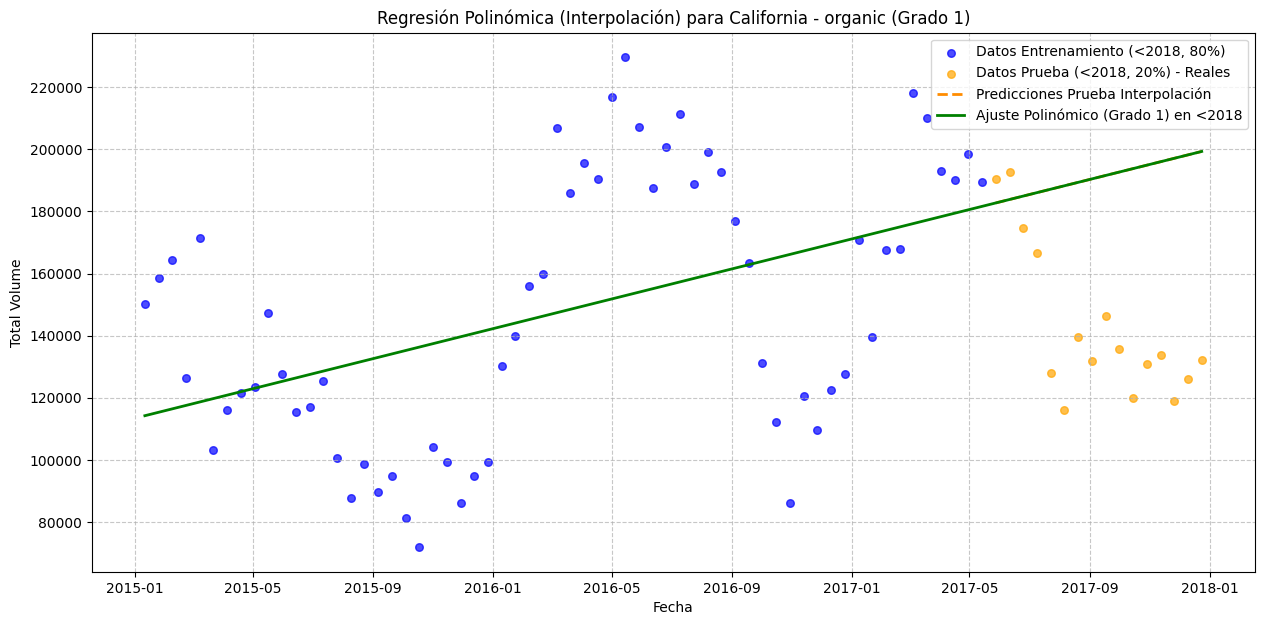

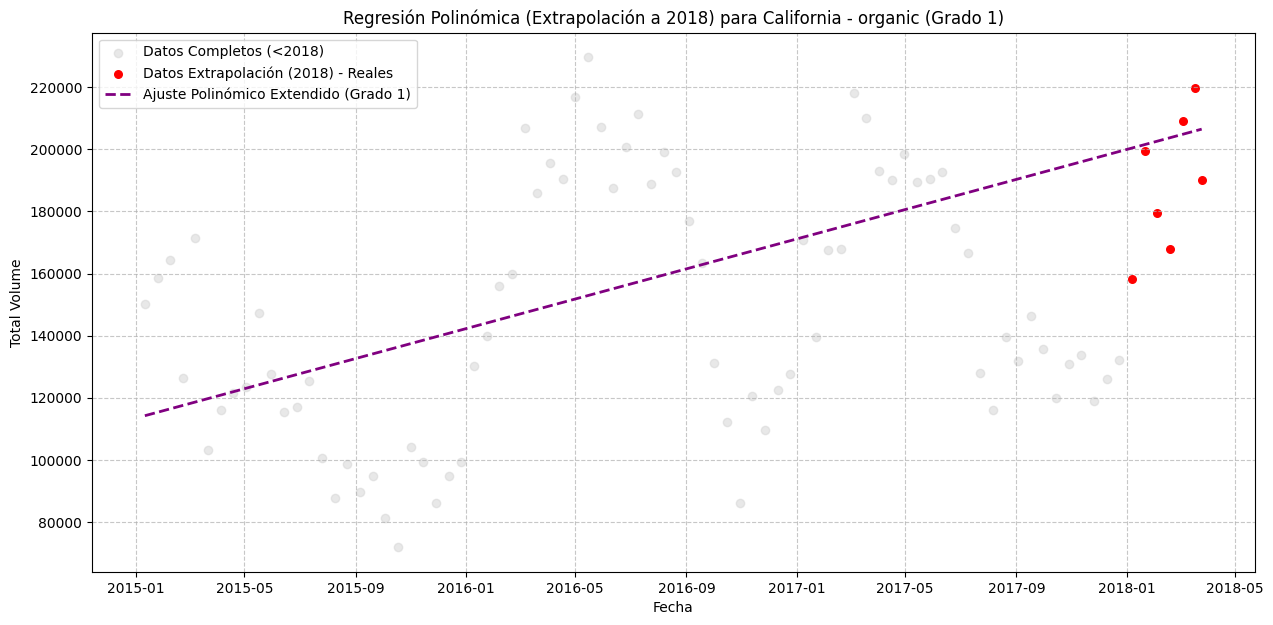

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import datetime as dt

# Cargar el dataset
try:
    df_full = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    print("Por favor, asegúrate de que el archivo está subido a Google Colab y el nombre es correcto.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# Preprocesamiento de datos
try:
    df_full['Date'] = pd.to_datetime(df_full['Date'])
    df_full['year'] = df_full['Date'].dt.year
    df_full['DateOrdinal'] = df_full['Date'].map(dt.datetime.toordinal)
except KeyError as e:
    print(f"Error: La columna {e} no se encontró. Verifica los nombres de las columnas en tu CSV.")
    exit()
except Exception as e:
    print(f"Ocurrió un error durante el preprocesamiento de fechas: {e}")
    exit()

# --- 1. Filtrar Datos ---
region_filter = 'California'
type_filter = 'organic' # Asegúrate que 'organic' es el valor exacto en tu columna 'type'

df_subset = df_full[(df_full['region'] == region_filter) & (df_full['type'] == type_filter)].sort_values(by='Date').copy() # Usar .copy() para evitar SettingWithCopyWarning

if df_subset.empty:
    print(f"No se encontraron datos para la región '{region_filter}' y el tipo '{type_filter}'.")
    exit()

print(f"--- Procesando Regresión Polinómica para: Región '{region_filter}' - Tipo '{type_filter}' ---")
print(f"Datos encontrados para esta combinación: {len(df_subset)} filas.")

# --- 2. Split Data ---
extrapolation_data = df_subset[df_subset['year'] == 2018]
interpolation_data_full = df_subset[df_subset['year'] < 2018]

if interpolation_data_full.empty:
    print("No hay datos anteriores a 2018 para esta combinación. No se puede entrenar el modelo polinómico.")
    exit()
if len(interpolation_data_full) < 10: # Umbral bajo, ajustar si es necesario
    print(f"Advertencia: Muy pocos datos anteriores a 2018 ({len(interpolation_data_full)} filas) para un análisis robusto.")

# Dividir datos de interpolación (anteriores a 2018) en entrenamiento (80%) y prueba (20%)
# shuffle=False es importante para mantener la secuencia temporal
X_interp_full_ordinal = interpolation_data_full['DateOrdinal'].values.reshape(-1, 1)
y_interp_full = interpolation_data_full['Total Volume'].values

# Asegurar suficientes muestras para el split
if len(X_interp_full_ordinal) < 2:
    print("No hay suficientes datos de interpolación para dividir en entrenamiento y prueba.")
    exit()

# Ajustar test_size si hay muy pocos datos para asegurar que ambos splits tengan datos.
# Mínimo 1 para test, si es posible.
n_samples_interp_full = len(X_interp_full_ordinal)
test_size_interp = 0.2
if n_samples_interp_full * test_size_interp < 1 and n_samples_interp_full > 1: # si 20% es menos de 1 muestra
    test_size_interp = 1 / n_samples_interp_full # usar 1 muestra para test
elif n_samples_interp_full <= 4 and n_samples_interp_full > 1 : # para 2-4 muestras, usar 1 para test
     test_size_interp = 1

try:
    X_interp_train_ordinal, X_interp_test_ordinal, y_interp_train, y_interp_test = train_test_split(
        X_interp_full_ordinal, y_interp_full, test_size=test_size_interp, shuffle=False
    )
except ValueError as e:
     print(f"Error durante la división de datos de interpolación: {e}")
     print(f"  Total de muestras de interpolación: {n_samples_interp_full}")
     exit()


# Guardar las fechas correspondientes para los gráficos
interp_train_dates = interpolation_data_full.iloc[:len(X_interp_train_ordinal)]['Date']
interp_test_dates = interpolation_data_full.iloc[len(X_interp_train_ordinal):len(X_interp_train_ordinal)+len(X_interp_test_ordinal)]['Date']


if len(X_interp_train_ordinal) == 0 or (test_size_interp > 0 and len(X_interp_test_ordinal) == 0) :
    print("No hay suficientes datos en los conjuntos de entrenamiento o prueba de interpolación después de la división.")
    exit()

print(f"Datos de interpolación (<2018): {len(interpolation_data_full)} filas.")
print(f"  - Conjunto de entrenamiento para interpolación: {len(X_interp_train_ordinal)} filas.")
print(f"  - Conjunto de prueba para interpolación: {len(X_interp_test_ordinal)} filas.")
if not extrapolation_data.empty:
    print(f"Datos de extrapolación (2018): {len(extrapolation_data)} filas.")
else:
    print("No hay datos de extrapolación (2018) para esta combinación.")


# --- 3. Hyperparameter Tuning (en interp_train_data) ---
# Crear un pipeline: PolynomialFeatures -> StandardScaler -> LinearRegression
pipeline = Pipeline([
    ("polynomialfeatures", PolynomialFeatures(include_bias=False)),
    ("standardscaler", StandardScaler()),
    ("linearregression", LinearRegression())
])

# Definir el rango de grados polinómicos a probar
# Grados muy altos pueden causar overfitting extremo.
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5]
}

# Configurar TimeSeriesSplit para validación cruzada
# n_splits no debe ser mayor que el número de muestras que permite TimeSeriesSplit
# Minimo de muestras en el primer set de entrenamiento es n_samples // (n_splits + 1)
# Si X_interp_train_ordinal es pequeño, reducir n_splits
n_cv_splits = 3
if len(X_interp_train_ordinal) < (n_cv_splits + 1) * 2: # Heurística simple
    n_cv_splits = 2
if len(X_interp_train_ordinal) < (n_cv_splits + 1) * 2:
    n_cv_splits = 1 # No es realmente CV, pero GridSearchCV lo manejará como una sola validación
    print(f"Advertencia: Pocos datos de entrenamiento ({len(X_interp_train_ordinal)}), usando validación simple en lugar de TimeSeriesSplit completo.")
    # En este caso, TimeSeriesSplit con n_splits=1 no es útil.
    # Si n_cv_splits es 1, es mejor usar un split manual o k-fold sin shuffle si TimeSeriesSplit no es adecuado.
    # Para simplificar, si los datos son muy escasos, GridSearchCV podría no ser ideal o daría resultados poco fiables.
    # Vamos a proceder, pero tenlo en cuenta. Un enfoque alternativo sería no usar CV.
    # Por ahora, dejaremos que TimeSeriesSplit lo maneje (puede fallar si es demasiado pequeño).
    # Forzamos n_splits a un valor mínimo que no cause error inmediato, pero idealmente se necesitan más datos.
    if len(X_interp_train_ordinal) <= 5: # Muy pocos datos para CV significativo
        n_cv_splits = 1 # O manejar este caso de forma diferente (ej. no hacer CV)
        print("Datos de entrenamiento de interpolación muy limitados para una búsqueda de hiperparámetros robusta con CV.")
    elif len(X_interp_train_ordinal) <=10:
        n_cv_splits = 2


if n_cv_splits > 1:
    time_series_cv = TimeSeriesSplit(n_splits=n_cv_splits)
    cv_method = time_series_cv
else: # Si n_cv_splits es 1, TimeSeriesSplit no es apropiado. Usar None para que use 5-fold por defecto (aunque no es ideal para series) o manejar.
      # O simplemente no hacer GridSearchCV si los datos son muy escasos.
      # Por simplicidad, si n_cv_splits termina siendo 1, procedemos con cautela.
      # GridSearchCV con cv=None o cv=entero usa KFold (o StratifiedKFold para clasificadores).
      # Aquí queremos respetar el orden temporal si es posible.
    print("Datos insuficientes para TimeSeriesSplit robusto. El resultado de GridSearchCV puede no ser óptimo.")
    # Para este caso, podríamos decidir no usar GridSearchCV o usar un cv más simple.
    # Por ahora, si es 1, es más bien una validación simple, no CV.
    # Si len(X_interp_train_ordinal) es realmente pequeño, el concepto de CV se rompe.
    # Considerar un simple bucle manual si TimeSeriesSplit no es viable.
    # Por ahora, si es 1, GridSearchCV podría usar un split por defecto que no respete el tiempo.
    # Una opción es no hacer CV si n_cv_splits < 2.
    if n_cv_splits < 2 :
         print("No se realizará GridSearchCV debido a datos insuficientes para TimeSeriesSplit significativo.")
         best_degree_poly = 2 # Default a grado 2 si no se puede hacer CV. Ajustar si se prefiere.
         grid_search = None
    else:
        cv_method = TimeSeriesSplit(n_splits=n_cv_splits)


if n_cv_splits >= 2 : # Solo si hay suficientes splits para CV
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv_method, scoring='neg_mean_squared_error', n_jobs=-1)
    print(f"Iniciando búsqueda de hiperparámetros (grado del polinomio) con {n_cv_splits}-fold TimeSeriesSplit...")
    try:
        grid_search.fit(X_interp_train_ordinal, y_interp_train)
        best_degree_poly = grid_search.best_params_['polynomialfeatures__degree']
        print(f"Mejor grado polinómico encontrado: {best_degree_poly}")
        # El best_estimator_ ya está reentrenado en todos los datos de X_interp_train_ordinal con los mejores parámetros
        final_poly_model = grid_search.best_estimator_
    except ValueError as e:
        print(f"Error durante GridSearchCV: {e}. Puede ser debido a muy pocos datos para los splits de CV.")
        print("Usando un grado polinómico por defecto de 2.")
        best_degree_poly = 2
        # Entrenar manualmente con el grado por defecto
        final_poly_model = Pipeline([
            ("polynomialfeatures", PolynomialFeatures(degree=best_degree_poly, include_bias=False)),
            ("standardscaler", StandardScaler()),
            ("linearregression", LinearRegression())
        ])
        final_poly_model.fit(X_interp_train_ordinal, y_interp_train)
else: # Si no se hizo GridSearchCV
    print(f"Usando grado polinómico por defecto: {best_degree_poly}")
    final_poly_model = Pipeline([
        ("polynomialfeatures", PolynomialFeatures(degree=best_degree_poly, include_bias=False)),
        ("standardscaler", StandardScaler()),
        ("linearregression", LinearRegression())
    ])
    final_poly_model.fit(X_interp_train_ordinal, y_interp_train)


# --- 5. Evaluar el final_poly_model ---
if len(X_interp_test_ordinal) > 0:
    y_pred_interp_test = final_poly_model.predict(X_interp_test_ordinal)
    rmse_interp_test = np.sqrt(mean_squared_error(y_interp_test, y_pred_interp_test))
    r2_interp_test = r2_score(y_interp_test, y_pred_interp_test)
    print(f"\nMétricas en el CONJUNTO DE PRUEBA DE INTERPOLACIÓN (<2018, 20%):")
    print(f"  RMSE: {rmse_interp_test:.2f}")
    print(f"  R^2: {r2_interp_test:.2f}")
else:
    print("\nNo hay datos en el conjunto de prueba de interpolación para evaluar.")

if not extrapolation_data.empty:
    X_extrap_ordinal = extrapolation_data['DateOrdinal'].values.reshape(-1, 1)
    y_extrap_actual = extrapolation_data['Total Volume'].values
    y_pred_extrap = final_poly_model.predict(X_extrap_ordinal)
    rmse_extrap = np.sqrt(mean_squared_error(y_extrap_actual, y_pred_extrap))
    r2_extrap = r2_score(y_extrap_actual, y_pred_extrap)
    print(f"\nMétricas en el CONJUNTO DE EXTRAPOLACIÓN (2018):")
    print(f"  RMSE: {rmse_extrap:.2f}")
    print(f"  R^2: {r2_extrap:.2f}")
else:
    print("\nNo hay datos de extrapolación (2018) para evaluar.")

# --- 6. Output y Plotting ---
# Plot 1: Enfoque en Interpolación
plt.figure(figsize=(15, 7))
plt.scatter(interp_train_dates, y_interp_train, color='blue', label='Datos Entrenamiento (<2018, 80%)', s=30, alpha=0.7)
if len(X_interp_test_ordinal) > 0:
    plt.scatter(interp_test_dates, y_interp_test, color='orange', label='Datos Prueba (<2018, 20%) - Reales', s=30, alpha=0.7)
    plt.plot(interp_test_dates, y_pred_interp_test, color='darkorange', linestyle='--', linewidth=2, label='Predicciones Prueba Interpolación')

# Línea del modelo polinómico sobre todo el rango de interpolación
X_plot_interp_ordinal = interpolation_data_full['DateOrdinal'].values.reshape(-1,1)
y_plot_interp_pred = final_poly_model.predict(X_plot_interp_ordinal)
plt.plot(interpolation_data_full['Date'], y_plot_interp_pred, color='green', linewidth=2, label=f'Ajuste Polinómico (Grado {best_degree_poly}) en <2018')

plt.title(f'Regresión Polinómica (Interpolación) para {region_filter} - {type_filter} (Grado {best_degree_poly})')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Plot 2: Enfoque en Extrapolación
if not extrapolation_data.empty:
    plt.figure(figsize=(15, 7))
    # Datos de interpolación como fondo
    plt.scatter(interpolation_data_full['Date'], interpolation_data_full['Total Volume'], color='lightgray', label='Datos Completos (<2018)', alpha=0.5)
    # Datos de extrapolación (2018)
    plt.scatter(extrapolation_data['Date'], extrapolation_data['Total Volume'], color='red', label='Datos Extrapolación (2018) - Reales', s=30)

    # Línea del modelo polinómico extendida a todos los datos (interpolación + extrapolación)
    X_plot_full_ordinal = df_subset['DateOrdinal'].values.reshape(-1,1) # Todas las fechas de la combinación
    y_plot_full_pred = final_poly_model.predict(X_plot_full_ordinal)
    plt.plot(df_subset['Date'], y_plot_full_pred, color='purple', linestyle='--', linewidth=2, label=f'Ajuste Polinómico Extendido (Grado {best_degree_poly})')

    plt.title(f'Regresión Polinómica (Extrapolación a 2018) para {region_filter} - {type_filter} (Grado {best_degree_poly})')
    plt.xlabel('Fecha')
    plt.ylabel('Total Volume')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No se genera gráfico de extrapolación porque no hay datos de 2018.")

--- Aplicando Regresión Polinómica de GRADO 3 para: Región 'California' - Tipo 'organic' ---
Datos encontrados para esta combinación: 85 filas.
Datos de interpolación (<2018): 78 filas.
  - Conjunto de entrenamiento para interpolación: 62 filas.
  - Conjunto de prueba para interpolación: 16 filas.
Datos de extrapolación (2018): 7 filas.

Entrenando modelo de regresión polinómica de grado 3...
Modelo entrenado.

Métricas en CONJUNTO DE PRUEBA DE INTERPOLACIÓN (<2018, 20%):
  RMSE: 44741.20
  R^2: -2.48

Métricas en CONJUNTO DE EXTRAPOLACIÓN (2018):
  RMSE: 211885.59
  R^2: -105.54


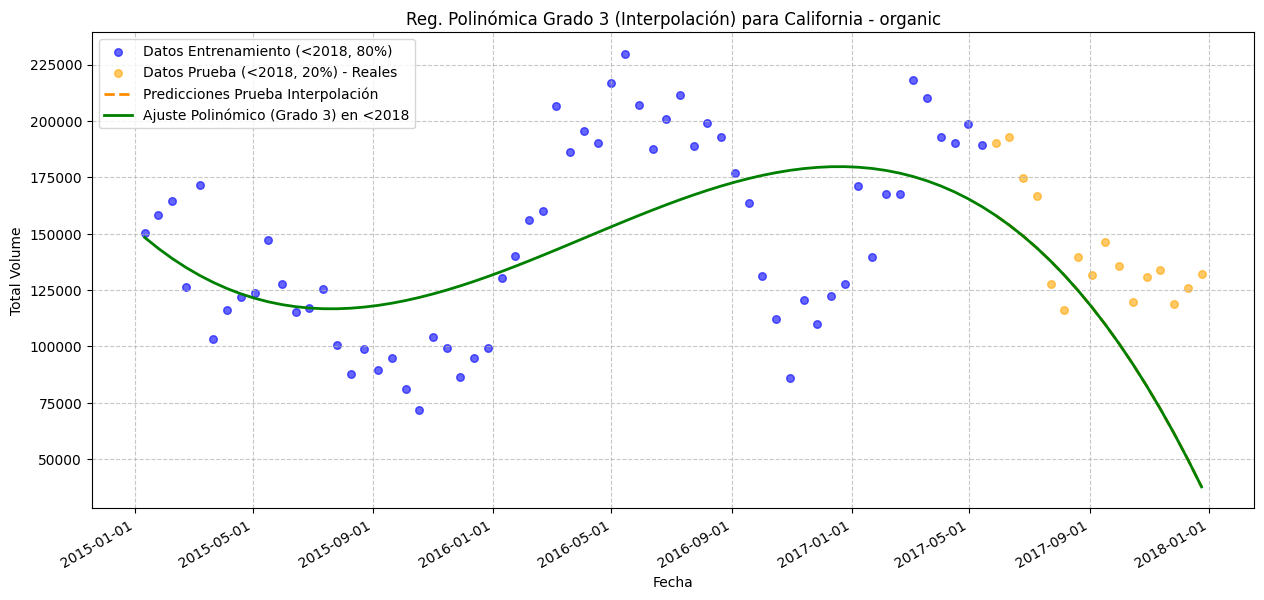

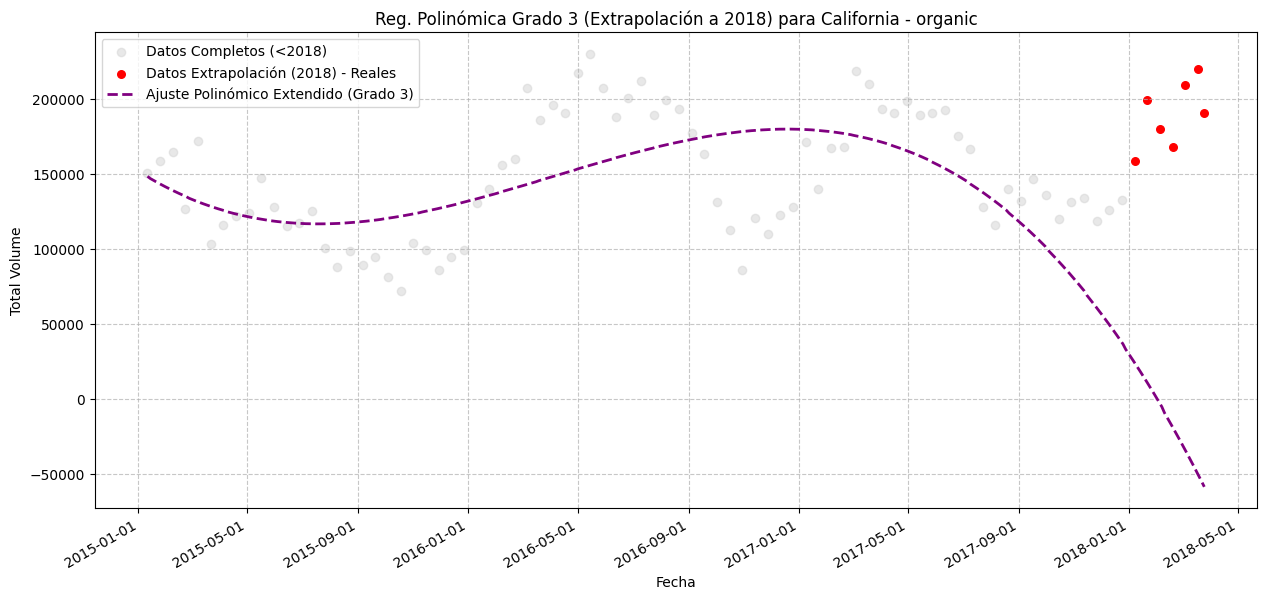


Proceso de Regresión Polinómica de Grado 3 completado.


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# --- 1. Cargar y Filtrar Datos ---
try:
    df_full = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# Preprocesamiento de datos
try:
    df_full['Date'] = pd.to_datetime(df_full['Date'])
    df_full['year'] = df_full['Date'].dt.year
    df_full['DateOrdinal'] = df_full['Date'].map(dt.datetime.toordinal)
except Exception as e:
    print(f"Ocurrió un error durante el preprocesamiento de fechas: {e}")
    exit()

region_filter = 'California'
type_filter = 'organic'

df_subset = df_full[(df_full['region'] == region_filter) & (df_full['type'] == type_filter)].sort_values(by='Date').copy()

if df_subset.empty:
    print(f"No se encontraron datos para la región '{region_filter}' y el tipo '{type_filter}'.")
    exit()

print(f"--- Aplicando Regresión Polinómica de GRADO 3 para: Región '{region_filter}' - Tipo '{type_filter}' ---")
print(f"Datos encontrados para esta combinación: {len(df_subset)} filas.")

# --- 2. Split Data (Consistente con solicitudes previas) ---
extrapolation_data = df_subset[df_subset['year'] == 2018]
interpolation_data_full = df_subset[df_subset['year'] < 2018]

if interpolation_data_full.empty:
    print("No hay datos anteriores a 2018 para esta combinación. No se puede entrenar el modelo.")
    exit()

if len(interpolation_data_full) < 10:
    print(f"Advertencia: Muy pocos datos anteriores a 2018 ({len(interpolation_data_full)} filas).")

# Preparar X e y para datos de interpolación
X_interp_full_ordinal = interpolation_data_full['DateOrdinal'].values.reshape(-1, 1)
y_interp_full = interpolation_data_full['Total Volume'].values

n_samples_interp_full = len(X_interp_full_ordinal)
if n_samples_interp_full < 2:
    print("No hay suficientes datos de interpolación para dividir en entrenamiento y prueba.")
    exit()

# Ajustar test_size para asegurar que ambos splits tengan datos si es posible
test_size_interp = 0.2
if n_samples_interp_full * test_size_interp < 1 and n_samples_interp_full > 1:
    test_size_interp = 1 / n_samples_interp_full
elif n_samples_interp_full <= 4 and n_samples_interp_full > 1 :
     test_size_interp = 1

try:
    X_interp_train_ordinal, X_interp_test_ordinal, y_interp_train, y_interp_test = train_test_split(
        X_interp_full_ordinal, y_interp_full, test_size=test_size_interp, shuffle=False
    )
except ValueError as e:
     print(f"Error durante la división de datos de interpolación: {e}")
     exit()

# Guardar las fechas correspondientes para los gráficos
interp_train_dates = interpolation_data_full.iloc[:len(X_interp_train_ordinal)]['Date']
interp_test_dates = interpolation_data_full.iloc[len(X_interp_train_ordinal):len(X_interp_train_ordinal)+len(X_interp_test_ordinal)]['Date']

if len(X_interp_train_ordinal) == 0 or (test_size_interp > 0 and len(X_interp_test_ordinal) == 0) :
    print("No hay suficientes datos en los conjuntos de entrenamiento o prueba de interpolación tras la división.")
    exit()

print(f"Datos de interpolación (<2018): {len(interpolation_data_full)} filas.")
print(f"  - Conjunto de entrenamiento para interpolación: {len(X_interp_train_ordinal)} filas.")
print(f"  - Conjunto de prueba para interpolación: {len(X_interp_test_ordinal)} filas.")
if not extrapolation_data.empty:
    print(f"Datos de extrapolación (2018): {len(extrapolation_data)} filas.")
else:
    print("No hay datos de extrapolación (2018) para esta combinación.")

# --- 3. Crear y Entrenar el Modelo Polinómico de Grado 3 ---
# Se usa un pipeline: PolynomialFeatures -> StandardScaler -> LinearRegression
# Grado fijado a 3
fixed_degree = 3

poly_model_deg3 = Pipeline([
    ("polynomialfeatures", PolynomialFeatures(degree=fixed_degree, include_bias=False)),
    ("standardscaler", StandardScaler()), # Estandarizar es importante con características polinómicas
    ("linearregression", LinearRegression())
])

print(f"\nEntrenando modelo de regresión polinómica de grado {fixed_degree}...")
if len(X_interp_train_ordinal) < fixed_degree +1 : # Se necesitan al menos 'degree+1' puntos para un polinomio de grado 'degree'
    print(f"No hay suficientes puntos de entrenamiento ({len(X_interp_train_ordinal)}) para un polinomio de grado {fixed_degree}. Se requieren al menos {fixed_degree+1}.")
    # Podríamos optar por un grado menor o detenernos
    exit()

poly_model_deg3.fit(X_interp_train_ordinal, y_interp_train)
print("Modelo entrenado.")

# --- 4. Evaluar el Modelo ---
# Evaluación en el conjunto de prueba de interpolación (<2018, 20%)
if len(X_interp_test_ordinal) > 0:
    y_pred_interp_test = poly_model_deg3.predict(X_interp_test_ordinal)
    rmse_interp_test = np.sqrt(mean_squared_error(y_interp_test, y_pred_interp_test))
    r2_interp_test = r2_score(y_interp_test, y_pred_interp_test)
    print(f"\nMétricas en CONJUNTO DE PRUEBA DE INTERPOLACIÓN (<2018, 20%):")
    print(f"  RMSE: {rmse_interp_test:.2f}")
    print(f"  R^2: {r2_interp_test:.2f}")
else:
    print("\nNo hay datos en el conjunto de prueba de interpolación para evaluar.")

# Evaluación en el conjunto de extrapolación (2018)
if not extrapolation_data.empty:
    X_extrap_ordinal = extrapolation_data['DateOrdinal'].values.reshape(-1, 1)
    y_extrap_actual = extrapolation_data['Total Volume'].values
    y_pred_extrap = poly_model_deg3.predict(X_extrap_ordinal)
    rmse_extrap = np.sqrt(mean_squared_error(y_extrap_actual, y_pred_extrap))
    r2_extrap = r2_score(y_extrap_actual, y_pred_extrap)
    print(f"\nMétricas en CONJUNTO DE EXTRAPOLACIÓN (2018):")
    print(f"  RMSE: {rmse_extrap:.2f}")
    print(f"  R^2: {r2_extrap:.2f}")
else:
    print("\nNo hay datos de extrapolación (2018) para evaluar.")

# --- 5. Graficar Resultados ---
# Plot 1: Enfoque en Interpolación
plt.figure(figsize=(15, 7))
plt.scatter(interp_train_dates, y_interp_train, color='blue', label='Datos Entrenamiento (<2018, 80%)', s=30, alpha=0.6)
if len(X_interp_test_ordinal) > 0:
    plt.scatter(interp_test_dates, y_interp_test, color='orange', label='Datos Prueba (<2018, 20%) - Reales', s=30, alpha=0.6)
    if 'y_pred_interp_test' in locals(): # Comprobar si la variable existe
        plt.plot(interp_test_dates, y_pred_interp_test, color='darkorange', linestyle='--', linewidth=2, label='Predicciones Prueba Interpolación')

# Línea del modelo polinómico sobre todo el rango de interpolación
X_plot_interp_ordinal = interpolation_data_full['DateOrdinal'].values.reshape(-1,1)
y_plot_interp_pred = poly_model_deg3.predict(X_plot_interp_ordinal)
plt.plot(interpolation_data_full['Date'], y_plot_interp_pred, color='green', linewidth=2, label=f'Ajuste Polinómico (Grado {fixed_degree}) en <2018')

plt.title(f'Reg. Polinómica Grado {fixed_degree} (Interpolación) para {region_filter} - {type_filter}')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12))
plt.gcf().autofmt_xdate()
plt.show()

# Plot 2: Enfoque en Extrapolación
if not extrapolation_data.empty:
    plt.figure(figsize=(15, 7))
    # Datos de interpolación como fondo
    plt.scatter(interpolation_data_full['Date'], interpolation_data_full['Total Volume'], color='lightgray', label='Datos Completos (<2018)', alpha=0.5)
    # Datos de extrapolación (2018)
    plt.scatter(extrapolation_data['Date'], y_extrap_actual, color='red', label='Datos Extrapolación (2018) - Reales', s=30)

    # Línea del modelo polinómico extendida a todos los datos (interpolación + extrapolación)
    # Para una línea suave, generamos puntos densos en el rango de fechas completo del subset
    min_date_ord = df_subset['DateOrdinal'].min()
    max_date_ord = df_subset['DateOrdinal'].max()
    X_plot_full_range_ordinal = np.linspace(min_date_ord, max_date_ord, 300).reshape(-1, 1) # 300 puntos para suavizar
    # Convertir estos ordinales de vuelta a fechas para el eje X del gráfico
    dates_plot_full_range = [dt.datetime.fromordinal(int(o)) for o in X_plot_full_range_ordinal.flatten()]

    y_plot_full_pred = poly_model_deg3.predict(X_plot_full_range_ordinal)
    plt.plot(dates_plot_full_range, y_plot_full_pred, color='purple', linestyle='--', linewidth=2, label=f'Ajuste Polinómico Extendido (Grado {fixed_degree})')

    plt.title(f'Reg. Polinómica Grado {fixed_degree} (Extrapolación a 2018) para {region_filter} - {type_filter}')
    plt.xlabel('Fecha')
    plt.ylabel('Total Volume')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12))
    plt.gcf().autofmt_xdate()
    plt.show()
else:
    print("No se genera gráfico de extrapolación porque no hay datos de 2018.")

print("\nProceso de Regresión Polinómica de Grado 3 completado.")

--- Aplicando Prophet (RETOCADO) para: Región 'California' - Tipo 'organic' ---
Datos de entrenamiento para Prophet (<2018): 78 filas.
Datos de prueba/extrapolación para Prophet (2018): 7 filas.


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe95so_al/vkhfeym4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe95so_al/yl7n4jpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59930', 'data', 'file=/tmp/tmpe95so_al/vkhfeym4.json', 'init=/tmp/tmpe95so_al/yl7n4jpa.json', 'output', 'file=/tmp/tmpe95so_al/prophet_modelfof3tl69/prophet_model-20250516144727.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:47:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Añadiendo regresor: Near_SuperBowl
Añadiendo regresor: Near_CincoDeMayo
Añadiendo regresor: Near_July4th
Añadiendo regresor: Near_Thanksgiving
Añadiendo regresor: Near_ChristmasNewYear


14:47:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Métricas de Prophet (RETOCADO) en el CONJUNTO DE PRUEBA/EXTRAPOLACIÓN (2018):
  RMSE: 14524.40
  R^2: 0.50

Generando gráficos de Prophet (RETOCADO)...


<ipython-input-7-669c3bc4eb94>:132: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  plt.fill_between(full_forecast['ds'].dt.to_pydatetime(),


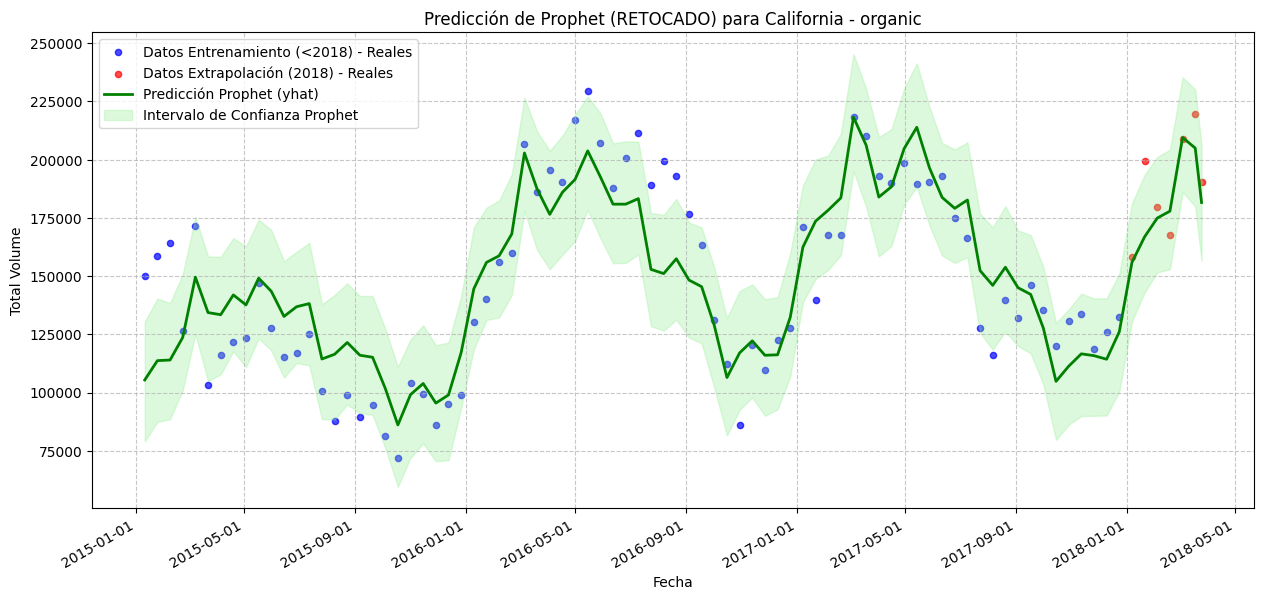


Generando gráfico de componentes de Prophet (RETOCADO)...


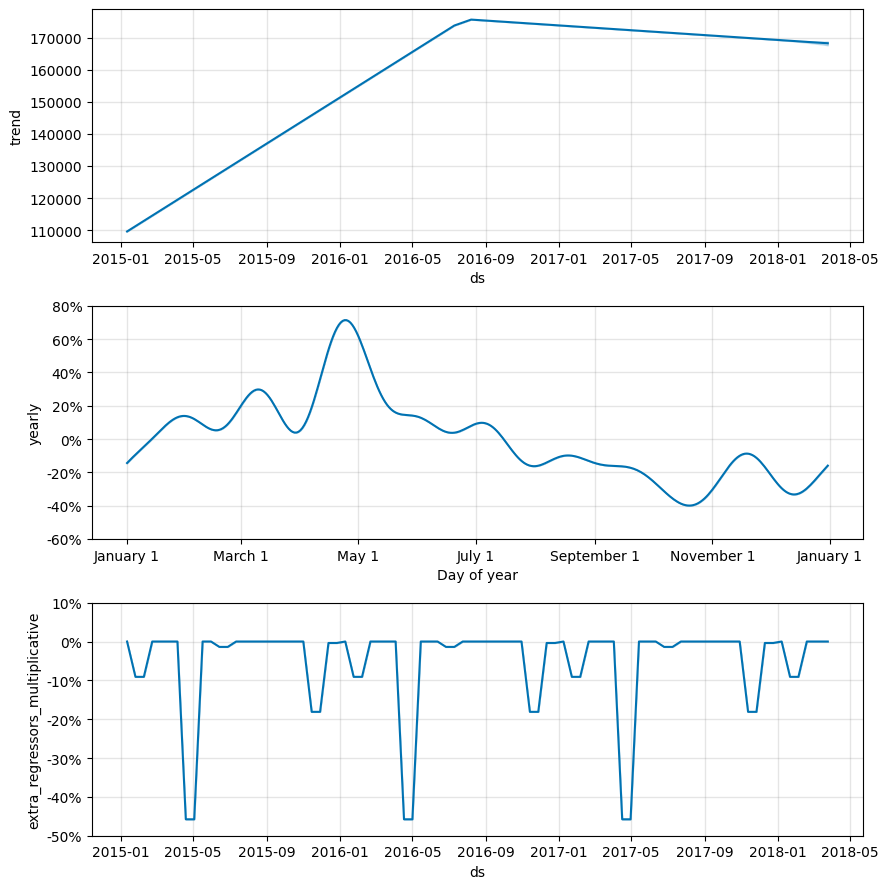


Proceso con Prophet (RETOCADO) completado.


In [7]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Cargar y Filtrar Datos ---
try:
    df_full = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# Preprocesamiento de la columna 'Date'
try:
    df_full['Date'] = pd.to_datetime(df_full['Date'])
    df_full['year'] = df_full['Date'].dt.year
except Exception as e:
    print(f"Ocurrió un error durante el preprocesamiento de fechas: {e}")
    exit()

region_filter = 'California'
type_filter = 'organic'

df_subset = df_full[(df_full['region'] == region_filter) & (df_full['type'] == type_filter)].sort_values(by='Date').copy()

if df_subset.empty:
    print(f"No se encontraron datos para la región '{region_filter}' y el tipo '{type_filter}'.")
    exit()

print(f"--- Aplicando Prophet (RETOCADO) para: Región '{region_filter}' - Tipo '{type_filter}' ---")

# Lista de columnas de regresores (festividades)
holiday_regressors = [
    "Near_SuperBowl", "Near_CincoDeMayo", "Near_July4th",
    "Near_Thanksgiving", "Near_ChristmasNewYear"
]
# Verificar que las columnas regresoras existen en el df_subset
actual_regressors_to_use = []
for regressor in holiday_regressors:
    if regressor in df_subset.columns:
        actual_regressors_to_use.append(regressor)
    else:
        print(f"Advertencia: La columna regresora '{regressor}' no se encontró y no se usará.")

if not actual_regressors_to_use:
    print("Advertencia: No se encontraron columnas regresoras de festividades en los datos.")

# --- 2. Preparar Datos para Prophet (incluyendo regresores) ---
# Columnas necesarias: 'ds', 'y', y las columnas regresoras
columns_for_prophet = ['Date', 'Total Volume'] + actual_regressors_to_use
prophet_df = df_subset[columns_for_prophet].rename(columns={'Date': 'ds', 'Total Volume': 'y'})

# --- 3. Dividir Datos: Entrenamiento (<2018) y Prueba/Extrapolación (2018) ---
# Necesitamos el año para dividir, asegurémonos de que 'year' está en df_subset
if 'year' not in df_subset.columns: # Debería estar por el preprocesamiento inicial de df_full
     df_subset['year'] = pd.to_datetime(df_subset['Date']).dt.year # Recrear 'Date' si no está, o usar 'ds' de prophet_df

# Usar los índices de prophet_df para alinear con df_subset['year'] para la división
train_df_prophet = prophet_df[df_subset['year'] < 2018].copy()
test_df_prophet = prophet_df[df_subset['year'] == 2018].copy()

if train_df_prophet.empty:
    print("No hay datos de entrenamiento (<2018) para Prophet.")
    exit()

print(f"Datos de entrenamiento para Prophet (<2018): {len(train_df_prophet)} filas.")
if not test_df_prophet.empty:
    print(f"Datos de prueba/extrapolación para Prophet (2018): {len(test_df_prophet)} filas.")
else:
    print("No hay datos de prueba (2018) para evaluar Prophet.")

# --- 4. Inicializar y Entrenar el Modelo Prophet (RETOCADO) ---
model = Prophet(
    seasonality_mode='multiplicative', # Probar estacionalidad multiplicativa
    changepoint_prior_scale=0.08,      # Tendencia un poco más flexible
    yearly_seasonality='auto',         # Estacionalidad anual (importante)
    weekly_seasonality='auto'          # Estacionalidad semanal (Prophet decidirá si es útil con datos bisemanales)
)

# Añadir los regresores de festividades
for regressor in actual_regressors_to_use:
    model.add_regressor(regressor)
    print(f"Añadiendo regresor: {regressor}")

# Entrenar el modelo. train_df_prophet ya contiene 'ds', 'y' y las columnas regresoras.
model.fit(train_df_prophet)

# --- 5. Realizar Predicciones ---
# Para evaluar, necesitamos que el DataFrame de predicción también tenga los regresores.
forecast_test = None
if not test_df_prophet.empty:
    # test_df_prophet ya contiene 'ds' y las columnas regresoras.
    # Prophet tomará las columnas 'ds' y las columnas regresoras de este DataFrame.
    forecast_test = model.predict(test_df_prophet.drop(columns=['y'], errors='ignore')) # Quitamos 'y' para predecir

# Predicciones para todo el rango de fechas (entrenamiento + prueba) para graficar
# prophet_df contiene 'ds' y las columnas regresoras para todo el periodo.
full_forecast = model.predict(prophet_df.drop(columns=['y'], errors='ignore'))


# --- 6. Evaluar el Modelo (sobre datos de 2018 si existen) ---
if forecast_test is not None and not test_df_prophet.empty:
    # Unir los valores reales 'y' de test_df_prophet con las predicciones 'yhat' de forecast_test
    # Asegurarse de que la unión se hace correctamente por 'ds'
    comparison_df = pd.merge(test_df_prophet[['ds', 'y']], forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

    if not comparison_df.empty:
        rmse_prophet_2018 = np.sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))
        r2_prophet_2018 = r2_score(comparison_df['y'], comparison_df['yhat'])
        print(f"\nMétricas de Prophet (RETOCADO) en el CONJUNTO DE PRUEBA/EXTRAPOLACIÓN (2018):")
        print(f"  RMSE: {rmse_prophet_2018:.2f}")
        print(f"  R^2: {r2_prophet_2018:.2f}")
    else:
        print("\nNo se pudo crear el DataFrame de comparación para la evaluación (posiblemente por problemas con fechas/índices).")
else:
    print("\nNo se pueden calcular métricas para 2018.")

# --- 7. Graficar Resultados ---
print("\nGenerando gráficos de Prophet (RETOCADO)...")

plt.figure(figsize=(15, 7))
plt.scatter(train_df_prophet['ds'], train_df_prophet['y'], color='blue', label='Datos Entrenamiento (<2018) - Reales', s=20, alpha=0.7)
if not test_df_prophet.empty:
    plt.scatter(test_df_prophet['ds'], test_df_prophet['y'], color='red', label='Datos Extrapolación (2018) - Reales', s=20, alpha=0.7)

plt.plot(full_forecast['ds'], full_forecast['yhat'], color='green', linestyle='-', linewidth=2, label='Predicción Prophet (yhat)')
plt.fill_between(full_forecast['ds'].dt.to_pydatetime(),
                 full_forecast['yhat_lower'],
                 full_forecast['yhat_upper'],
                 color='lightgreen', alpha=0.3, label='Intervalo de Confianza Prophet')

plt.title(f'Predicción de Prophet (RETOCADO) para {region_filter} - {type_filter}')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12))
plt.gcf().autofmt_xdate()
plt.show()

try:
    print("\nGenerando gráfico de componentes de Prophet (RETOCADO)...")
    # El gráfico de componentes ahora también mostrará el efecto de los regresores añadidos.
    fig2 = model.plot_components(full_forecast)
    plt.show()
except Exception as e:
    print(f"No se pudieron graficar los componentes: {e}")

print("\nProceso con Prophet (RETOCADO) completado.")

In [8]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# --- 1. Cargar Datos y Preprocesamiento Inicial ---
try:
    df_complete = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# Preprocesamiento de la columna 'Date' una vez
try:
    df_complete['Date'] = pd.to_datetime(df_complete['Date'])
    df_complete['year'] = df_complete['Date'].dt.year
except Exception as e:
    print(f"Ocurrió un error durante el preprocesamiento de fechas: {e}")
    exit()

# --- 2. Identificar Combinaciones Únicas ---
if 'region' not in df_complete.columns or 'type' not in df_complete.columns:
    print("Error: Las columnas 'region' o 'type' no se encuentran en el DataFrame.")
    exit()
unique_combinations = df_complete[['region', 'type']].drop_duplicates()

print(f"Se procesarán {len(unique_combinations)} combinaciones únicas de region-type.\n")

# Lista de columnas de regresores (festividades) - Definida globalmente
holiday_regressor_columns = [
    "Near_SuperBowl", "Near_CincoDeMayo", "Near_July4th",
    "Near_Thanksgiving", "Near_ChristmasNewYear"
]

# --- 3. Bucle a Través de las Combinaciones ---
for index, combo_row in unique_combinations.iterrows():
    current_region = combo_row['region']
    current_type = combo_row['type']

    print(f"--- Procesando Prophet (RETOCADO) para: Región '{current_region}' - Tipo '{current_type}' ---")

    # Filtrar DataFrame para la combinación actual
    df_subset = df_complete[(df_complete['region'] == current_region) & (df_complete['type'] == current_type)].sort_values(by='Date').copy()

    if df_subset.empty:
        print("No se encontraron datos para esta combinación. Saltando...\n")
        continue

    if len(df_subset) < 10: # Umbral mínimo de datos para intentar modelar
        print(f"Datos insuficientes ({len(df_subset)} filas) para esta combinación. Saltando...\n")
        continue

    # Verificar qué columnas regresoras existen para este subconjunto
    actual_regressors_to_use_for_combo = []
    for regressor_col_name in holiday_regressor_columns:
        if regressor_col_name in df_subset.columns:
            actual_regressors_to_use_for_combo.append(regressor_col_name)
        else:
            # Esta advertencia es menos probable si las columnas están en df_complete o no lo están para ninguna fila.
            # print(f"Advertencia para {current_region}-{current_type}: Columna regresora '{regressor_col_name}' no encontrada.")
            pass # No imprimir advertencia por cada combinación si la columna falta globalmente


    # Preparar Datos para Prophet (incluyendo regresores)
    columns_for_prophet = ['Date', 'Total Volume'] + actual_regressors_to_use_for_combo
    prophet_df_current = df_subset[columns_for_prophet].rename(columns={'Date': 'ds', 'Total Volume': 'y'})

    # Dividir Datos: Entrenamiento (<2018) y Prueba/Extrapolación (2018)
    # El df_subset ya tiene la columna 'year'
    train_df_prophet_current = prophet_df_current[df_subset['year'] < 2018].copy()
    test_df_prophet_current = prophet_df_current[df_subset['year'] == 2018].copy()

    if train_df_prophet_current.empty or len(train_df_prophet_current) < 5 : # Mínimo de puntos para entrenar
        print(f"No hay suficientes datos de entrenamiento (<2018) para {current_region}-{current_type}. Saltando...\n")
        continue

    print(f"  Datos de entrenamiento (<2018): {len(train_df_prophet_current)} filas.")
    if not test_df_prophet_current.empty:
        print(f"  Datos de prueba/extrapolación (2018): {len(test_df_prophet_current)} filas.")
    else:
        print("  No hay datos de prueba/extrapolación (2018) para esta combinación.")

    # Inicializar y Entrenar el Modelo Prophet (RETOCADO)
    model = Prophet(
        seasonality_mode='multiplicative',
        changepoint_prior_scale=0.08,
        yearly_seasonality='auto',
        weekly_seasonality='auto' # Prophet es bisemanal, Prophet lo manejará
    )

    for regressor in actual_regressors_to_use_for_combo:
        model.add_regressor(regressor)
    if actual_regressors_to_use_for_combo:
        print(f"  Regresores añadidos: {', '.join(actual_regressors_to_use_for_combo)}")

    try:
        model.fit(train_df_prophet_current)
    except Exception as e:
        print(f"  Error al entrenar Prophet para {current_region}-{current_type}: {e}. Saltando...\n")
        continue

    # Realizar Predicciones
    forecast_test_current = None
    if not test_df_prophet_current.empty:
        # El DataFrame para predecir debe tener 'ds' y las columnas regresoras
        df_for_test_prediction = test_df_prophet_current.drop(columns=['y'], errors='ignore')
        if not df_for_test_prediction.empty:
             forecast_test_current = model.predict(df_for_test_prediction)

    # Predicciones para todo el rango para graficar
    df_for_full_prediction = prophet_df_current.drop(columns=['y'], errors='ignore')
    if not df_for_full_prediction.empty:
        full_forecast_current = model.predict(df_for_full_prediction)
    else:
        print("  No se pueden generar predicciones completas (df_for_full_prediction vacío). Saltando gráficos...")
        continue


    # Evaluar el Modelo (sobre datos de 2018 si existen)
    if forecast_test_current is not None and not test_df_prophet_current.empty:
        comparison_df = pd.merge(test_df_prophet_current[['ds', 'y']], forecast_test_current[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
        if not comparison_df.empty and 'y' in comparison_df.columns and 'yhat' in comparison_df.columns:
            rmse_prophet_2018 = np.sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))
            r2_prophet_2018 = r2_score(comparison_df['y'], comparison_df['yhat'])
            print(f"  Métricas (RETOCADO) en Prueba/Extrapolación (2018): RMSE={rmse_prophet_2018:.2f}, R^2={r2_prophet_2018:.2f}")
        else:
            print("  No se pudo crear el DataFrame de comparación completo para la evaluación de 2018.")
    else:
        print("  No se calcularon métricas para 2018 (sin datos de prueba o predicciones).")

    # Graficar Resultados
    print(f"  Generando gráficos para {current_region}-{current_type}...")
    plt.figure(figsize=(15, 7))
    plt.scatter(train_df_prophet_current['ds'], train_df_prophet_current['y'], color='blue', label='Entrenamiento (<2018) - Reales', s=20, alpha=0.6)
    if not test_df_prophet_current.empty:
        plt.scatter(test_df_prophet_current['ds'], test_df_prophet_current['y'], color='red', label='Extrapolación (2018) - Reales', s=20, alpha=0.6)

    plt.plot(full_forecast_current['ds'], full_forecast_current['yhat'], color='green', linestyle='-', linewidth=2, label='Predicción Prophet (yhat)')
    plt.fill_between(full_forecast_current['ds'].dt.to_pydatetime(),
                     full_forecast_current['yhat_lower'],
                     full_forecast_current['yhat_upper'],
                     color='lightgreen', alpha=0.3, label='Intervalo de Confianza')
    plt.title(f'Prophet (RETOCADO) para: {current_region} - {current_type}')
    plt.xlabel('Fecha')
    plt.ylabel('Total Volume')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=5, maxticks=10))
    plt.gcf().autofmt_xdate()
    plt.show()

    try:
        if actual_regressors_to_use_for_combo or model.extra_regressors: # Solo si hay regresores o estacionalidades por defecto
            fig_components = model.plot_components(full_forecast_current)
            # Añadir título al gráfico de componentes
            if fig_components: # plot_components devuelve una figura
                fig_components.suptitle(f'Componentes Prophet para: {current_region} - {type_filter}', y=1.02) # Ajustar 'y' si es necesario
                plt.show()
    except Exception as e:
        print(f"  No se pudieron graficar los componentes para {current_region}-{current_type}: {e}")

    print("-" * 70 + "\n") # Separador

print("Proceso completado para todas las combinaciones.")

Output hidden; open in https://colab.research.google.com to view.

--- Modelo Random Forest para: Región 'California' - Tipo 'organic' ---
Datos encontrados para esta combinación: 85 filas.
Características a utilizar: ['DateOrdinal', 'year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear', 'Near_SuperBowl', 'Near_CincoDeMayo', 'Near_July4th', 'Near_Thanksgiving', 'Near_ChristmasNewYear']
  - Conjunto de entrenamiento para interpolación: 62 filas.
  - Conjunto de prueba para interpolación: 16 filas.
  - Conjunto de extrapolación (2018): 7 filas.

Entrenando modelo Random Forest con parámetros: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Modelo entrenado.

Métricas de ajuste en CONJUNTO DE ENTRENAMIENTO

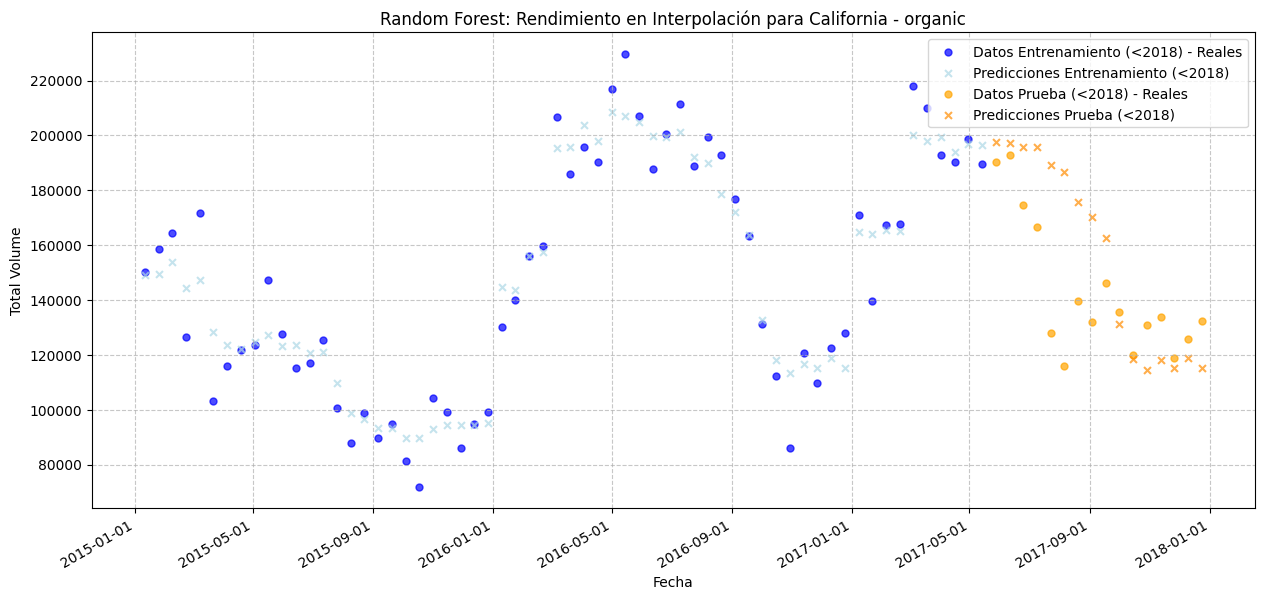

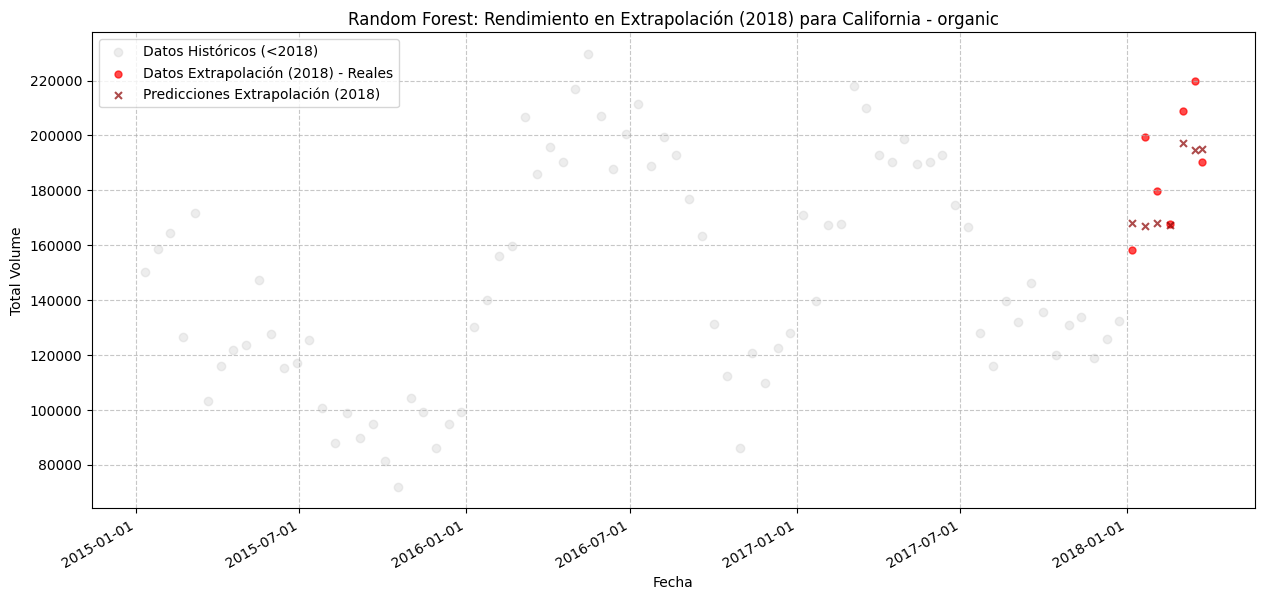


Proceso con Random Forest completado.


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# --- 1. Cargar Datos ---
try:
    df_full = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# --- 2. Preprocesamiento Inicial y Selección de Combinación ---
try:
    df_full['Date'] = pd.to_datetime(df_full['Date'])
    df_full['year'] = df_full['Date'].dt.year # Para facilitar el filtrado y como feature
except Exception as e:
    print(f"Ocurrió un error durante el preprocesamiento de fechas: {e}")
    exit()

region_filter = 'California'
type_filter = 'organic'

df_subset = df_full[(df_full['region'] == region_filter) & (df_full['type'] == type_filter)].sort_values(by='Date').copy()

if df_subset.empty:
    print(f"No se encontraron datos para la región '{region_filter}' y el tipo '{type_filter}'.")
    exit()

print(f"--- Modelo Random Forest para: Región '{region_filter}' - Tipo '{type_filter}' ---")
print(f"Datos encontrados para esta combinación: {len(df_subset)} filas.")

# --- 3. Ingeniería de Características ---
df_subset['DateOrdinal'] = df_subset['Date'].map(dt.datetime.toordinal)
df_subset['Month'] = df_subset['Date'].dt.month
df_subset['Day'] = df_subset['Date'].dt.day
df_subset['DayOfWeek'] = df_subset['Date'].dt.dayofweek # Lunes=0, Domingo=6
df_subset['DayOfYear'] = df_subset['Date'].dt.dayofyear
df_subset['WeekOfYear'] = df_subset['Date'].dt.isocalendar().week.astype(int)
# 'year' ya fue creada

# Lista de columnas de festividades/regresores
holiday_regressor_columns = [
    "Near_SuperBowl", "Near_CincoDeMayo", "Near_July4th",
    "Near_Thanksgiving", "Near_ChristmasNewYear"
]
# Verificar cuáles de estas columnas realmente existen en el df_subset
feature_columns = ['DateOrdinal', 'year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear']
existing_holiday_regressors = []
for col in holiday_regressor_columns:
    if col in df_subset.columns:
        existing_holiday_regressors.append(col)
    else:
        print(f"Advertencia: Columna de festividad '{col}' no encontrada en el subset.")

feature_columns.extend(existing_holiday_regressors)
target_column = 'Total Volume'

print(f"Características a utilizar: {feature_columns}")

# Verificar que todas las columnas de características existan
missing_features = [col for col in feature_columns if col not in df_subset.columns]
if missing_features:
    print(f"Error: Faltan las siguientes columnas de características en el DataFrame: {missing_features}")
    exit()


# --- 4. Preparar X (features) e y (target) ---
X = df_subset[feature_columns]
y = df_subset[target_column]
dates = df_subset['Date'] # Para graficar

# --- 5. División de Datos ---
# Índices para la división
idx_pre_2018 = df_subset[df_subset['year'] < 2018].index
idx_2018 = df_subset[df_subset['year'] == 2018].index

if idx_pre_2018.empty:
    print("No hay datos anteriores a 2018 para entrenar el modelo.")
    exit()

X_interpolation_full = X.loc[idx_pre_2018]
y_interpolation_full = y.loc[idx_pre_2018]
dates_interpolation_full = dates.loc[idx_pre_2018]

# Dividir datos de interpolación en entrenamiento (80%) y prueba (20%)
# shuffle=False es importante para mantener la secuencia temporal
# Asegurar suficientes muestras para el split
if len(X_interpolation_full) < 2:
    print(f"No hay suficientes datos de interpolación ({len(X_interpolation_full)}) para dividir en entrenamiento y prueba.")
    exit()

test_size_interp = 0.2
# Si el 20% es menos de 1 muestra, pero hay más de 1 muestra en total, usar 1 para test
if len(X_interpolation_full) * test_size_interp < 1 and len(X_interpolation_full) > 1:
    test_size_interp = 1 / len(X_interpolation_full)
# Para 2-4 muestras, usar 1 para test si test_size_interp es 0.2
elif len(X_interpolation_full) <=4 and len(X_interpolation_full) > 1 and test_size_interp == 0.2 :
     test_size_interp = 1

X_interp_train, X_interp_test, y_interp_train, y_interp_test, dates_interp_train, dates_interp_test = train_test_split(
    X_interpolation_full, y_interpolation_full, dates_interpolation_full, test_size=test_size_interp, shuffle=False
)

# Datos de extrapolación (2018)
X_extrap = X.loc[idx_2018]
y_extrap = y.loc[idx_2018]
dates_extrap = dates.loc[idx_2018]

print(f"  - Conjunto de entrenamiento para interpolación: {len(X_interp_train)} filas.")
print(f"  - Conjunto de prueba para interpolación: {len(X_interp_test)} filas.")
if not X_extrap.empty:
    print(f"  - Conjunto de extrapolación (2018): {len(X_extrap)} filas.")
else:
    print("  No hay datos de extrapolación (2018) para esta combinación.")


# --- 6. Entrenamiento del Modelo Random Forest ---
# Usaremos algunos parámetros comunes. Para una mejor performance, se podrían buscar hiperparámetros.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5, min_samples_leaf=3)
print(f"\nEntrenando modelo Random Forest con parámetros: {rf_model.get_params()}")

if X_interp_train.empty:
    print("El conjunto de entrenamiento de interpolación está vacío. No se puede entrenar.")
    exit()

rf_model.fit(X_interp_train, y_interp_train)
print("Modelo entrenado.")

# --- 7. Predicciones del Modelo ---
y_pred_interp_train = rf_model.predict(X_interp_train) # Predicciones sobre el mismo training set (para ver ajuste)

if not X_interp_test.empty:
    y_pred_interp_test = rf_model.predict(X_interp_test)
else:
    y_pred_interp_test = np.array([]) # Vacío si no hay datos de prueba de interpolación

if not X_extrap.empty:
    y_pred_extrap = rf_model.predict(X_extrap)
else:
    y_pred_extrap = np.array([]) # Vacío si no hay datos de extrapolación

# --- 8. Evaluación del Modelo ---
print(f"\nMétricas de ajuste en CONJUNTO DE ENTRENAMIENTO DE INTERPOLACIÓN (<2018, 80%):")
rmse_interp_train_fit = np.sqrt(mean_squared_error(y_interp_train, y_pred_interp_train))
r2_interp_train_fit = r2_score(y_interp_train, y_pred_interp_train)
print(f"  RMSE (ajuste entrenamiento): {rmse_interp_train_fit:.2f}")
print(f"  R^2 (ajuste entrenamiento): {r2_interp_train_fit:.2f}")


if not X_interp_test.empty:
    rmse_interp_test = np.sqrt(mean_squared_error(y_interp_test, y_pred_interp_test))
    r2_interp_test = r2_score(y_interp_test, y_pred_interp_test)
    print(f"\nMétricas en CONJUNTO DE PRUEBA DE INTERPOLACIÓN (<2018, 20%):")
    print(f"  RMSE: {rmse_interp_test:.2f}")
    print(f"  R^2: {r2_interp_test:.2f}")
else:
    print("\nNo hay datos en el conjunto de prueba de interpolación para evaluar.")

if not X_extrap.empty:
    rmse_extrap = np.sqrt(mean_squared_error(y_extrap, y_pred_extrap))
    r2_extrap = r2_score(y_extrap, y_pred_extrap)
    print(f"\nMétricas en CONJUNTO DE EXTRAPOLACIÓN (2018):")
    print(f"  RMSE: {rmse_extrap:.2f}")
    print(f"  R^2: {r2_extrap:.2f}")
else:
    print("\nNo hay datos de extrapolación (2018) para evaluar.")

# --- 9. Graficar Resultados ---
print("\nGenerando gráficos de rendimiento del Random Forest...")

# Gráfico 1: Rendimiento en Interpolación (Entrenamiento y Prueba < 2018)
plt.figure(figsize=(15, 7))
plt.scatter(dates_interp_train, y_interp_train, color='blue', label='Datos Entrenamiento (<2018) - Reales', s=25, alpha=0.7)
plt.scatter(dates_interp_train, y_pred_interp_train, color='lightblue', label='Predicciones Entrenamiento (<2018)', s=25, alpha=0.7, marker='x')


if not X_interp_test.empty:
    plt.scatter(dates_interp_test, y_interp_test, color='orange', label='Datos Prueba (<2018) - Reales', s=25, alpha=0.7)
    plt.scatter(dates_interp_test, y_pred_interp_test, color='darkorange', label='Predicciones Prueba (<2018)', s=25, alpha=0.7, marker='x')

plt.title(f'Random Forest: Rendimiento en Interpolación para {region_filter} - {type_filter}')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12))
plt.gcf().autofmt_xdate()
plt.show()

# Gráfico 2: Rendimiento en Extrapolación (2018)
if not X_extrap.empty:
    plt.figure(figsize=(15, 7))
    # Datos históricos como contexto (opcional, se pueden usar solo los de entrenamiento)
    plt.scatter(dates_interpolation_full, y_interpolation_full, color='lightgray', label='Datos Históricos (<2018)', alpha=0.4)

    plt.scatter(dates_extrap, y_extrap, color='red', label='Datos Extrapolación (2018) - Reales', s=25, alpha=0.7)
    plt.scatter(dates_extrap, y_pred_extrap, color='darkred', label='Predicciones Extrapolación (2018)', s=25, alpha=0.7, marker='x')

    plt.title(f'Random Forest: Rendimiento en Extrapolación (2018) para {region_filter} - {type_filter}')
    plt.xlabel('Fecha')
    plt.ylabel('Total Volume')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=10))
    plt.gcf().autofmt_xdate()
    plt.show()
else:
    print("No se genera gráfico de extrapolación (sin datos de 2018).")

print("\nProceso con Random Forest completado.")

--- Random Forest con GridSearchCV para: 'California' - 'organic' ---
  - Conjunto de entrenamiento para interpolación (usado en GridSearchCV): 62 filas.
  - Conjunto de prueba para interpolación (validación final): 16 filas.
  - Conjunto de extrapolación (2018): 7 filas.

Iniciando GridSearchCV para Random Forest (con 3-fold TimeSeriesSplit)...
Fitting 3 folds for each of 150 candidates, totalling 450 fits
Mejores parámetros encontrados:
{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 40}

Métricas de ajuste del MEJOR MODELO en CONJUNTO DE ENTRENAMIENTO DE INTERPOLACIÓN:
  RMSE (ajuste entrenamiento): 31491.47
  R^2 (ajuste entrenamiento): 0.46

Métricas del MEJOR MODELO en CONJUNTO DE PRUEBA DE INTERPOLACIÓN (<2018, 20%):
  RMSE: 22490.08
  R^2: 0.12

Métricas del MEJOR MODELO en CONJUNTO DE EXTRAPOLACIÓN (2018):
  RMSE: 31565.13
  R^2: -1.36

Generando gráficos de rendimiento del MEJOR Random Forest...


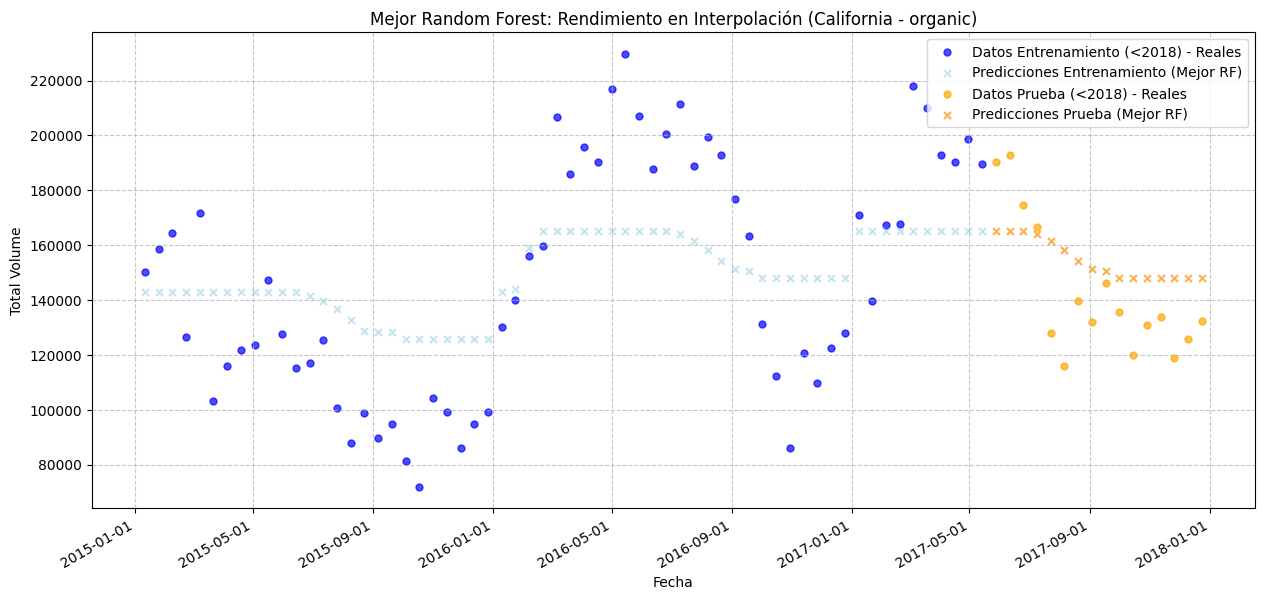

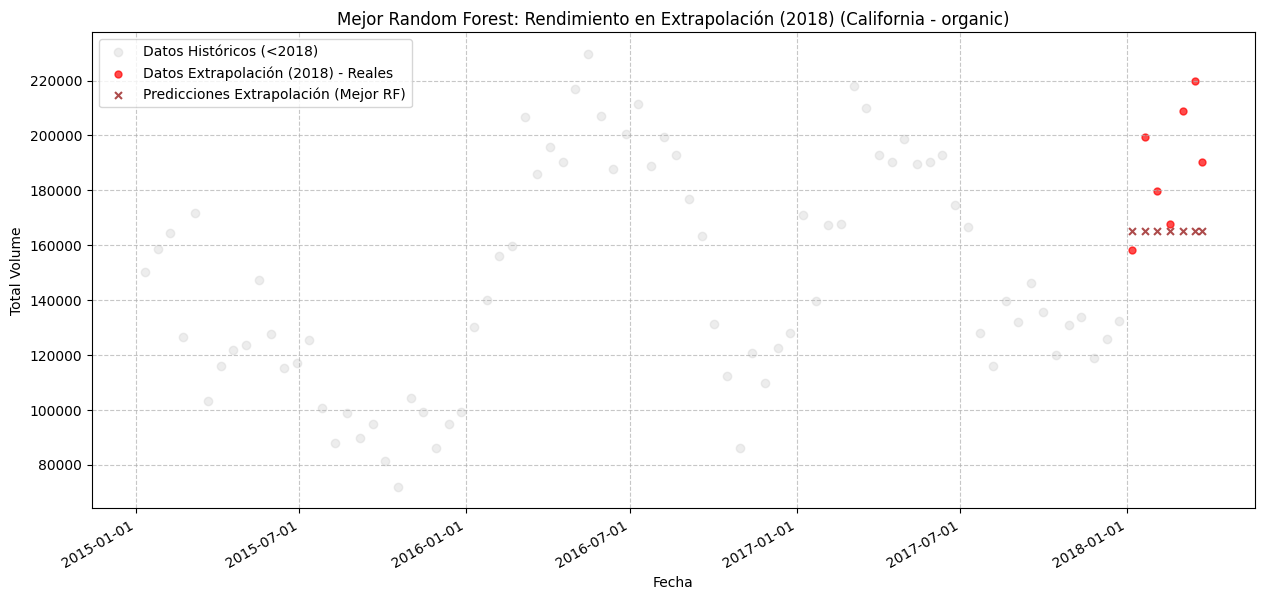


Proceso con GridSearchCV para Random Forest completado.


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

# --- 1. Cargar Datos ---
try:
    df_full = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

# --- 2. Preprocesamiento Inicial y Selección de Combinación ---
try:
    df_full['Date'] = pd.to_datetime(df_full['Date'])
    df_full['year'] = df_full['Date'].dt.year
except Exception as e:
    print(f"Ocurrió un error durante el preprocesamiento de fechas: {e}")
    exit()

region_filter = 'California'
type_filter = 'organic'

df_subset = df_full[(df_full['region'] == region_filter) & (df_full['type'] == type_filter)].sort_values(by='Date').copy()

if df_subset.empty:
    print(f"No se encontraron datos para la región '{region_filter}' y el tipo '{type_filter}'.")
    exit()

print(f"--- Random Forest con GridSearchCV para: '{region_filter}' - '{type_filter}' ---")

# --- 3. Ingeniería de Características ---
df_subset['DateOrdinal'] = df_subset['Date'].map(dt.datetime.toordinal)
df_subset['Month'] = df_subset['Date'].dt.month
df_subset['Day'] = df_subset['Date'].dt.day
df_subset['DayOfWeek'] = df_subset['Date'].dt.dayofweek
df_subset['DayOfYear'] = df_subset['Date'].dt.dayofyear
df_subset['WeekOfYear'] = df_subset['Date'].dt.isocalendar().week.astype(int)

holiday_regressor_columns = [
    "Near_SuperBowl", "Near_CincoDeMayo", "Near_July4th",
    "Near_Thanksgiving", "Near_ChristmasNewYear"
]
feature_columns = ['DateOrdinal', 'year', 'Month', 'Day', 'DayOfWeek', 'DayOfYear', 'WeekOfYear']
existing_holiday_regressors = []
for col in holiday_regressor_columns:
    if col in df_subset.columns:
        existing_holiday_regressors.append(col)
feature_columns.extend(existing_holiday_regressors)
target_column = 'Total Volume'

# --- 4. Preparar X (features) e y (target) ---
X = df_subset[feature_columns]
y = df_subset[target_column]
dates = df_subset['Date']

# --- 5. División de Datos ---
idx_pre_2018 = df_subset[df_subset['year'] < 2018].index
idx_2018 = df_subset[df_subset['year'] == 2018].index

if idx_pre_2018.empty:
    print("No hay datos anteriores a 2018 para entrenar.")
    exit()

X_interpolation_full = X.loc[idx_pre_2018]
y_interpolation_full = y.loc[idx_pre_2018]
dates_interpolation_full = dates.loc[idx_pre_2018]

if len(X_interpolation_full) < 10: # Umbral mínimo para tener un split de CV decente
    print(f"Datos de interpolación ({len(X_interpolation_full)} filas) son muy escasos para GridSearchCV con TimeSeriesSplit robusto.")
    # Podríamos salir o usar un modelo con parámetros por defecto más conservadores
    # Por ahora, se intentará, pero la CV puede no ser muy estable.

test_size_interp = 0.2
if len(X_interpolation_full) * test_size_interp < 1 and len(X_interpolation_full) > 1:
    test_size_interp = 1 / len(X_interpolation_full)
elif len(X_interpolation_full) <=4 and len(X_interpolation_full) > 1 and test_size_interp == 0.2 :
     test_size_interp = 1


X_interp_train, X_interp_test, y_interp_train, y_interp_test, dates_interp_train, dates_interp_test = train_test_split(
    X_interpolation_full, y_interpolation_full, dates_interpolation_full, test_size=test_size_interp, shuffle=False
)

X_extrap = X.loc[idx_2018]
y_extrap = y.loc[idx_2018]
dates_extrap = dates.loc[idx_2018]

print(f"  - Conjunto de entrenamiento para interpolación (usado en GridSearchCV): {len(X_interp_train)} filas.")
print(f"  - Conjunto de prueba para interpolación (validación final): {len(X_interp_test)} filas.")
if not X_extrap.empty:
    print(f"  - Conjunto de extrapolación (2018): {len(X_extrap)} filas.")

# --- 6. Búsqueda de Hiperparámetros para Random Forest con GridSearchCV ---
rf = RandomForestRegressor(random_state=42, n_jobs=-1, n_estimators=100) # n_estimators puede ser parte del grid si se desea

# Definir el grid de parámetros a probar
# Empezamos con rangos conservadores para controlar el overfitting
param_grid_rf = {
    'max_depth': [3, 5, 7, 10, 13, None], # None significa sin límite (más propenso a overfit)
    'min_samples_split': [10, 20, 40, 50, 60],
    'min_samples_leaf': [5, 10, 20, 25, 30],
    # 'max_features': ['auto', 'sqrt', 'log2'] # Podría añadirse si es necesario
}

# Configurar TimeSeriesSplit para validación cruzada
# Asegurarse de que haya suficientes datos para los splits
n_cv_splits = 3
if len(X_interp_train) < n_cv_splits * 2 : # Una condición simple para tener al menos 2 muestras por split de entrenamiento
    n_cv_splits = 2
if len(X_interp_train) < n_cv_splits * 2:
    print(f"Datos de entrenamiento ({len(X_interp_train)}) insuficientes para {n_cv_splits} splits de TimeSeriesSplit. Usando CV por defecto o un modelo simple.")
    # En este caso, podríamos no hacer GridSearchCV o usar un modelo con params conservadores fijos.
    # Por ahora, si es muy pequeño, GridSearchCV podría usar k-fold si TimeSeriesSplit falla.
    # Mejor es asegurarse de que hay suficientes datos.
    # Si len(X_interp_train) < (min_samples_split * n_cv_splits), puede fallar.
    # Para este ejemplo, si es muy pequeño, ajustamos n_splits o se informa
    if len(X_interp_train) < 10: # Si es muy, muy pequeño
         print("ADVERTENCIA: Conjunto de entrenamiento de interpolación es muy pequeño para GridSearchCV robusto. Resultados pueden no ser óptimos.")
         # Considerar usar parámetros fijos conservadores si esto ocurre
         # Ejemplo: best_rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1)
         # y saltar GridSearchCV

time_series_cv = TimeSeriesSplit(n_splits=n_cv_splits)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf,
                              cv=time_series_cv, n_jobs=-1, verbose=1, scoring='r2') # Usamos r2 para maximizar

print(f"\nIniciando GridSearchCV para Random Forest (con {n_cv_splits}-fold TimeSeriesSplit)...")
try:
    grid_search_rf.fit(X_interp_train, y_interp_train)
    print("Mejores parámetros encontrados:")
    print(grid_search_rf.best_params_)
    best_rf_model = grid_search_rf.best_estimator_
except ValueError as e:
    print(f"Error durante GridSearchCV: {e}. Esto puede ocurrir si los datos son muy escasos para los splits de CV.")
    print("Usando un modelo Random Forest con parámetros por defecto más conservadores.")
    best_rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1)
    best_rf_model.fit(X_interp_train, y_interp_train)


# --- 7. Predicciones con el Mejor Modelo ---
y_pred_interp_train = best_rf_model.predict(X_interp_train)

if not X_interp_test.empty:
    y_pred_interp_test = best_rf_model.predict(X_interp_test)
else:
    y_pred_interp_test = np.array([])

if not X_extrap.empty:
    y_pred_extrap = best_rf_model.predict(X_extrap)
else:
    y_pred_extrap = np.array([])

# --- 8. Evaluación del Mejor Modelo ---
print(f"\nMétricas de ajuste del MEJOR MODELO en CONJUNTO DE ENTRENAMIENTO DE INTERPOLACIÓN:")
rmse_interp_train_fit = np.sqrt(mean_squared_error(y_interp_train, y_pred_interp_train))
r2_interp_train_fit = r2_score(y_interp_train, y_pred_interp_train)
print(f"  RMSE (ajuste entrenamiento): {rmse_interp_train_fit:.2f}")
print(f"  R^2 (ajuste entrenamiento): {r2_interp_train_fit:.2f}")

if not X_interp_test.empty:
    rmse_interp_test = np.sqrt(mean_squared_error(y_interp_test, y_pred_interp_test))
    r2_interp_test = r2_score(y_interp_test, y_pred_interp_test)
    print(f"\nMétricas del MEJOR MODELO en CONJUNTO DE PRUEBA DE INTERPOLACIÓN (<2018, 20%):")
    print(f"  RMSE: {rmse_interp_test:.2f}")
    print(f"  R^2: {r2_interp_test:.2f}")
else:
    print("\nNo hay datos en el conjunto de prueba de interpolación para evaluar el mejor modelo.")

if not X_extrap.empty:
    rmse_extrap = np.sqrt(mean_squared_error(y_extrap, y_pred_extrap))
    r2_extrap = r2_score(y_extrap, y_pred_extrap)
    print(f"\nMétricas del MEJOR MODELO en CONJUNTO DE EXTRAPOLACIÓN (2018):")
    print(f"  RMSE: {rmse_extrap:.2f}")
    print(f"  R^2: {r2_extrap:.2f}")
else:
    print("\nNo hay datos de extrapolación (2018) para evaluar el mejor modelo.")

# --- 9. Graficar Resultados del Mejor Modelo ---
# (Misma lógica de gráficos que antes, solo asegúrate de usar dates_interp_train, dates_interp_test, dates_extrap)
print("\nGenerando gráficos de rendimiento del MEJOR Random Forest...")

plt.figure(figsize=(15, 7))
plt.scatter(dates_interp_train, y_interp_train, color='blue', label='Datos Entrenamiento (<2018) - Reales', s=25, alpha=0.7)
plt.scatter(dates_interp_train, y_pred_interp_train, color='lightblue', label='Predicciones Entrenamiento (Mejor RF)', s=25, alpha=0.7, marker='x')
if not X_interp_test.empty:
    plt.scatter(dates_interp_test, y_interp_test, color='orange', label='Datos Prueba (<2018) - Reales', s=25, alpha=0.7)
    plt.scatter(dates_interp_test, y_pred_interp_test, color='darkorange', label='Predicciones Prueba (Mejor RF)', s=25, alpha=0.7, marker='x')
plt.title(f'Mejor Random Forest: Rendimiento en Interpolación ({region_filter} - {type_filter})')
plt.xlabel('Fecha')
plt.ylabel('Total Volume')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=12))
plt.gcf().autofmt_xdate()
plt.show()

if not X_extrap.empty:
    plt.figure(figsize=(15, 7))
    plt.scatter(dates_interpolation_full, y_interpolation_full, color='lightgray', label='Datos Históricos (<2018)', alpha=0.4)
    plt.scatter(dates_extrap, y_extrap, color='red', label='Datos Extrapolación (2018) - Reales', s=25, alpha=0.7)
    plt.scatter(dates_extrap, y_pred_extrap, color='darkred', label='Predicciones Extrapolación (Mejor RF)', s=25, alpha=0.7, marker='x')
    plt.title(f'Mejor Random Forest: Rendimiento en Extrapolación (2018) ({region_filter} - {type_filter})')
    plt.xlabel('Fecha')
    plt.ylabel('Total Volume')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(minticks=6, maxticks=10))
    plt.gcf().autofmt_xdate()
    plt.show()
else:
    print("No se genera gráfico de extrapolación (sin datos de 2018).")

print("\nProceso con GridSearchCV para Random Forest completado.")

Datos encontrados para 'California' - 'organic': 85 filas.

Procesando frecuencia de la serie temporal. Objetivo: '2W-SUN'
Frecuencia inferida de los datos originales: None
No se pudo inferir frecuencia adecuada o es muy diferente. Remuestreando a '2W-SUN' sumando los valores.
Frecuencia final de ts_volume: 2W-SUN

--- 'ts_volume' preparada ---
Date
2015-01-11    150230.22500
2015-01-25    158452.81000
2015-02-08    164411.15500
2015-02-22    126460.62000
2015-03-08    171586.48875
Freq: 2W-SUN, Name: Total Volume, dtype: float64
Longitud total de ts_volume: 85
Tamaño del conjunto de extrapolación (2018): 7
Tamaño de los datos para modelado (<=2017): 78
Tamaño del conjunto de entrenamiento final: 62
Tamaño del conjunto de prueba final: 16


Ajustando Modelo: SARIMA_CalOrg_(1,1,0)(0,1,1)26
Ajustando el modelo...

--- Resumen del Modelo SARIMA ---
                                      SARIMAX Results                                       
Dep. Variable:                         Total Volu

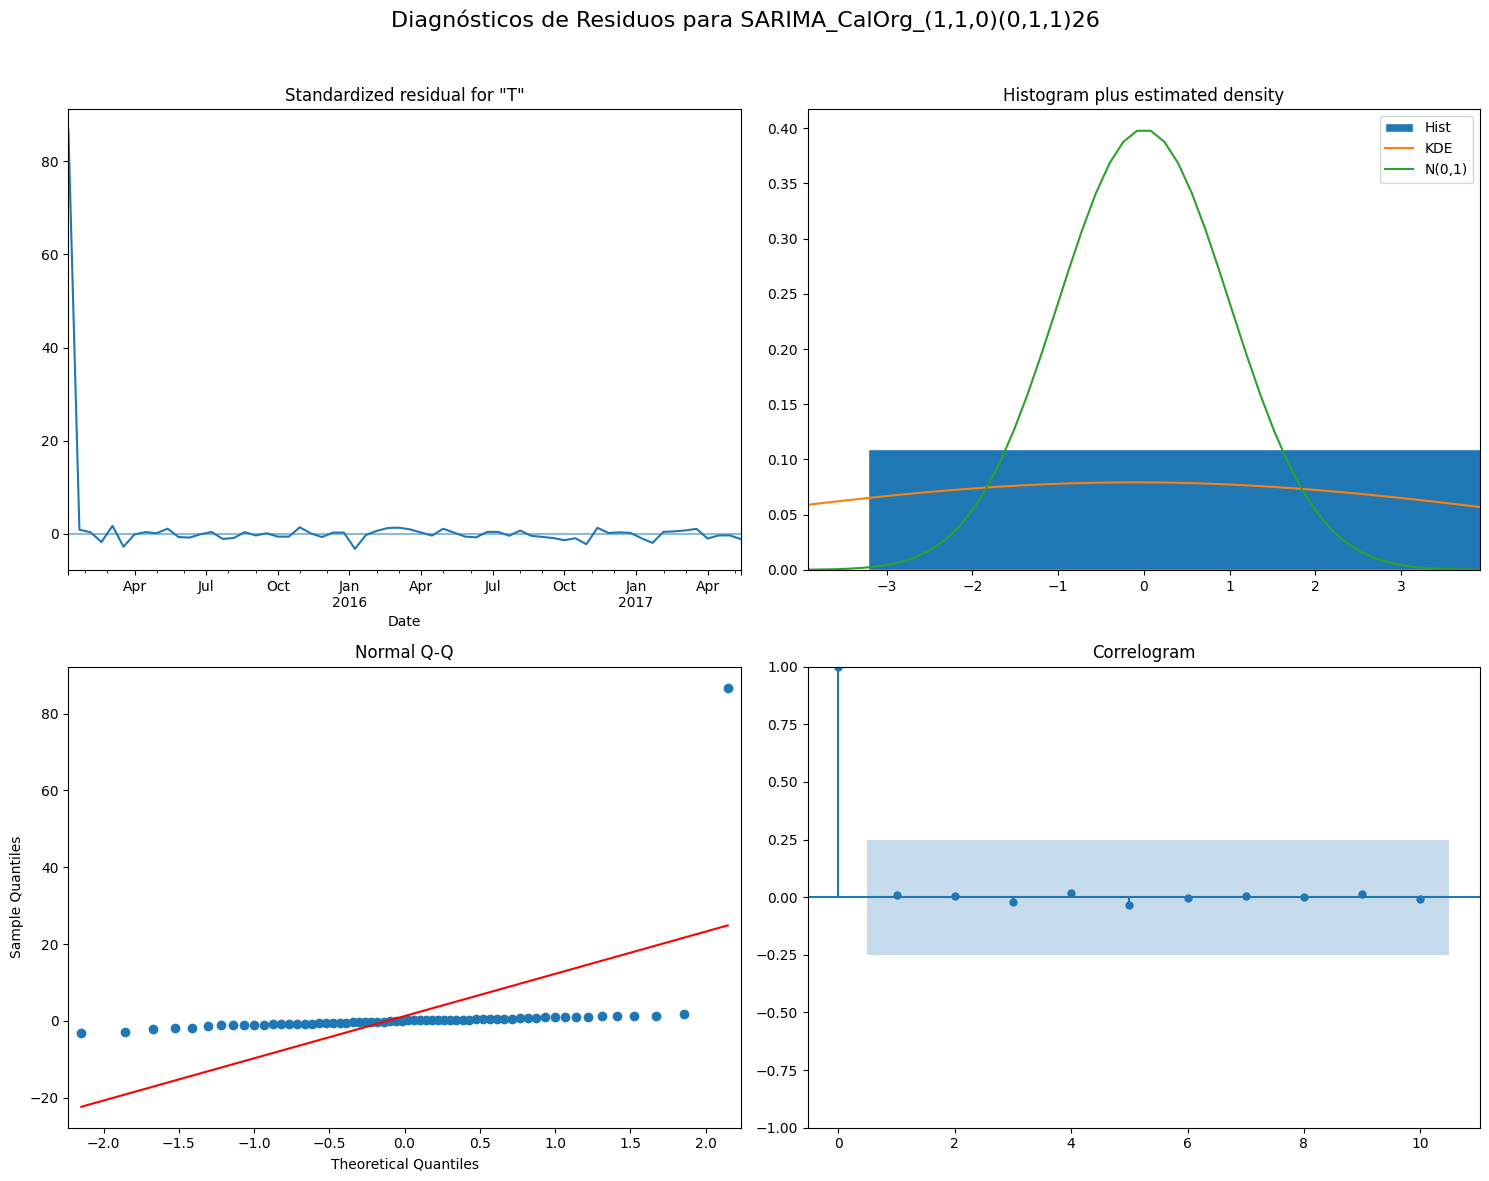


Generando predicciones para el conjunto de prueba...
RMSE en el conjunto de prueba para SARIMA_CalOrg_(1,1,0)(0,1,1)26: 19703.32
R^2 en el conjunto de prueba para SARIMA_CalOrg_(1,1,0)(0,1,1)26: 0.32

Generando predicciones para el conjunto de extrapolación (2018)...
RMSE en el conjunto de extrapolación para SARIMA_CalOrg_(1,1,0)(0,1,1)26: 34650.35
R^2 en el conjunto de extrapolación para SARIMA_CalOrg_(1,1,0)(0,1,1)26: -1.85


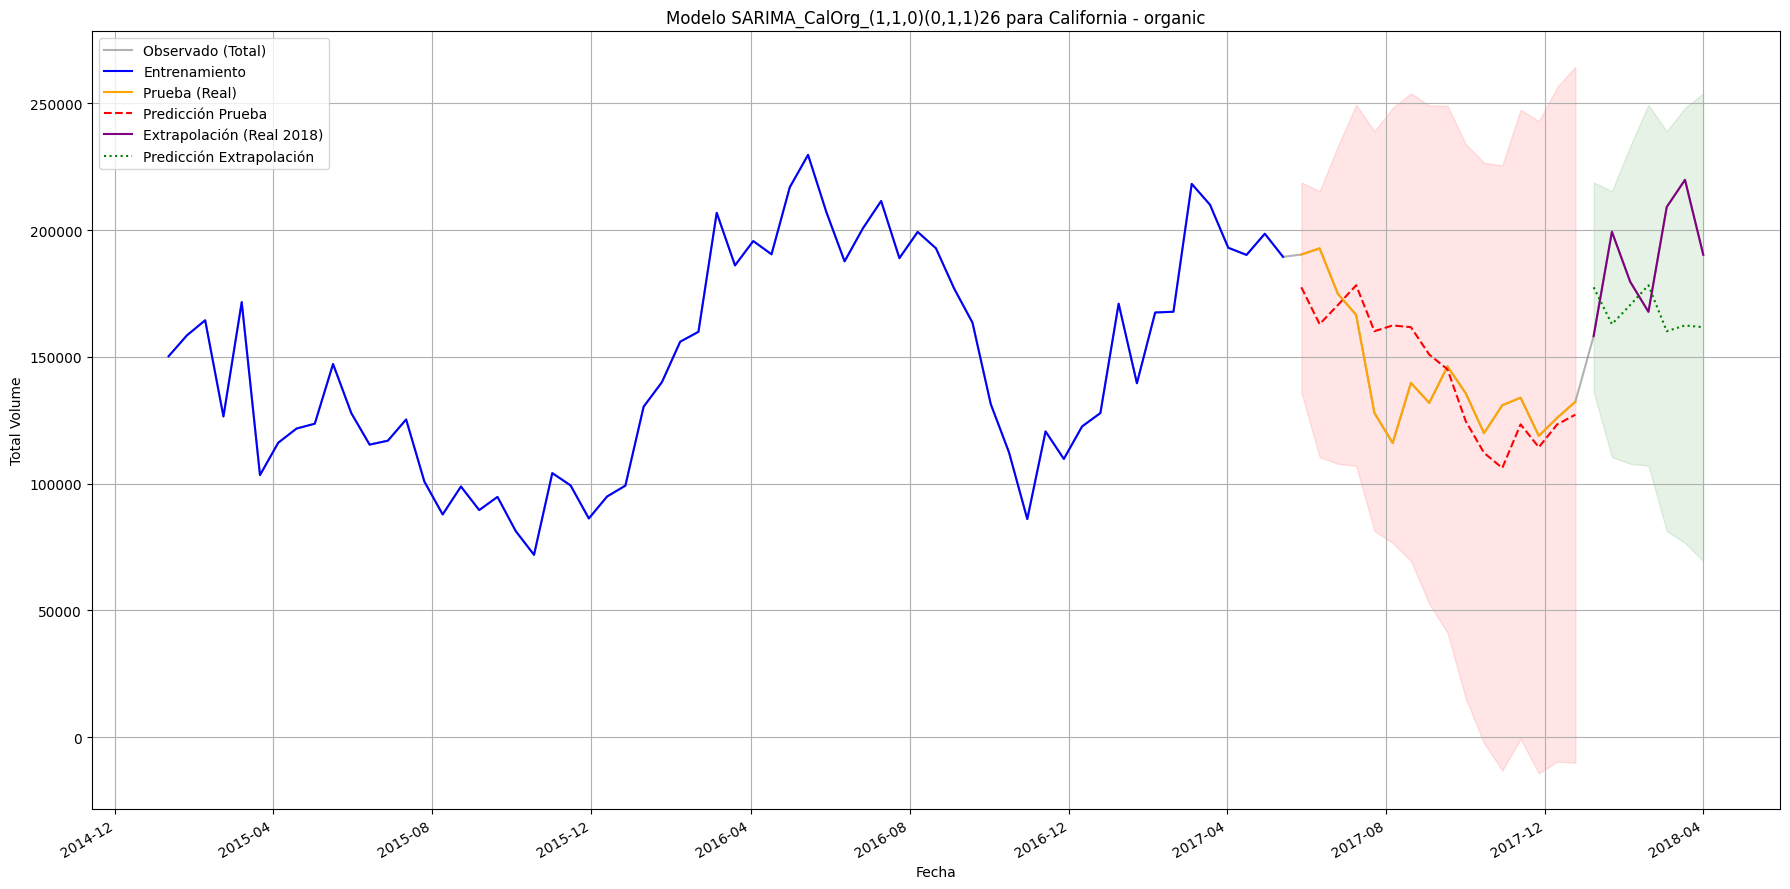



{'='*50}
Resultados del Modelo SARIMA para California - organic
                                        AIC          BIC    RMSE_Test  \
SARIMA_CalOrg_(1,1,0)(0,1,1)26  8934.358111  8940.739514  19703.31724   

                                 R2_Test   RMSE_Extrap  R2_Extrap  
SARIMA_CalOrg_(1,1,0)(0,1,1)26  0.324688  34650.349188  -1.849322  


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score # Añadido R^2
import statsmodels.api as sm # Para plot_diagnostics
import warnings

warnings.filterwarnings("ignore") # Suprimir warnings comunes

# --- 1. Cargar y Filtrar Datos para 'California' - 'organic' ---
try:
    df_main = pd.read_csv('df_seleccion_especifica.csv')
except FileNotFoundError:
    print("Error: El archivo 'df_seleccion_especifica.csv' no se encontró.")
    exit()
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")
    exit()

region_filter = 'California'
type_filter = 'organic'

df_filtered = df_main[(df_main['region'] == region_filter) & (df_main['type'] == type_filter)].copy()

if df_filtered.empty:
    print(f"No se encontraron datos para la región '{region_filter}' y el tipo '{type_filter}'.")
    exit()
else:
    print(f"Datos encontrados para '{region_filter}' - '{type_filter}': {len(df_filtered)} filas.")

# --- Inicio de la preparación de datos (adaptado de tu código) ---

# Asegurar que la columna 'Date' existe y es datetime, y luego establecerla como índice
if 'Date' not in df_filtered.columns:
    print("Error: La columna 'Date' no se encuentra en el DataFrame filtrado.")
    raise KeyError("Columna 'Date' no encontrada.")

df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered = df_filtered.set_index('Date')

if not isinstance(df_filtered.index, pd.DatetimeIndex):
    print("Error: No se pudo establecer un DatetimeIndex en el DataFrame filtrado.")
    raise TypeError("df_filtered.index no es DatetimeIndex.")

df_filtered = df_filtered.sort_index()
if 'Total Volume' not in df_filtered.columns:
    raise KeyError("'Total Volume' no encontrado en el DataFrame filtrado. Verifica el nombre de la columna.")

ts_volume_original = df_filtered['Total Volume'].dropna()

# Asegurar una frecuencia bisemanal (ej., '2W-SUN')
target_freq = '2W-SUN' # Bi-semanal, terminando en Domingo. Ajusta si tu definición de bisemanal es diferente.
                       # Por ejemplo, '2W' para simplemente cada dos semanas desde el inicio.
ts_volume = pd.Series(dtype='float64')

try:
    print(f"\nProcesando frecuencia de la serie temporal. Objetivo: '{target_freq}'")
    # Si los datos ya tienen la frecuencia correcta y son regulares, asfreq es suficiente.
    # Si no, resample es más robusto para agregar/interpolar.
    # Como los datos son "bisemanales", es posible que ya estén en esa frecuencia o cerca.

    # Primero, intentamos ver si la frecuencia se puede inferir y es la correcta
    inferred_freq = pd.infer_freq(ts_volume_original.index)
    print(f"Frecuencia inferida de los datos originales: {inferred_freq}")

    if inferred_freq == target_freq:
        print(f"La frecuencia inferida ({inferred_freq}) coincide con el objetivo. Usando asfreq para asegurar la regularidad.")
        ts_volume = ts_volume_original.asfreq(target_freq, method='ffill') # Usar ffill para rellenar posibles huecos exactos
    elif inferred_freq and 'W' in inferred_freq.upper() : # Si infiere algo semanal pero no exactamente 2W-SUN
        print(f"Frecuencia inferida ({inferred_freq}) es semanal pero no {target_freq}. Remuestreando a {target_freq} sumando los valores.")
        ts_volume = ts_volume_original.resample(target_freq).sum()
    else: # Si no se infiere frecuencia o es muy diferente, remuestrear
        print(f"No se pudo inferir frecuencia adecuada o es muy diferente. Remuestreando a '{target_freq}' sumando los valores.")
        ts_volume = ts_volume_original.resample(target_freq).sum()
        # Si el remuestreo crea un índice sin frecuencia explícita, intentamos asignarla
        if ts_volume.index.freq is None and len(ts_volume.index) > 1:
            ts_volume = ts_volume.asfreq(target_freq, method='ffill')


    if ts_volume.isnull().any():
        print("Advertencia: El establecimiento de frecuencia/remuestreo introdujo NaNs. Rellenando con ffill y bfill...")
        ts_volume = ts_volume.fillna(method='ffill').fillna(method='bfill')

    # Comprobación final de NaNs
    if ts_volume.isnull().any():
        print("Error: Todavía hay NaNs después de rellenar. Revisa la integridad de los datos y el proceso de remuestreo.")
        ts_volume.dropna(inplace=True) # Eliminar NaNs restantes como último recurso
        if ts_volume.empty:
            raise ValueError("'ts_volume' quedó vacía después de eliminar NaNs.")


    final_inferred_freq = pd.infer_freq(ts_volume.index)
    print(f"Frecuencia final de ts_volume: {final_inferred_freq if final_inferred_freq else 'No inferida explícitamente, pero regularizada.'}")


except Exception as e:
    print(f"Error durante el establecimiento de la frecuencia: {e}. Usando datos originales sin frecuencia explícita forzada (SARIMA podría fallar o dar resultados inesperados).")
    ts_volume = ts_volume_original.copy() # Copiar para evitar modificar el original si falla

if ts_volume.empty:
    print("Error: 'ts_volume' está vacía después de la preparación. Revisa los datos de origen y el filtrado.")
    raise ValueError("'ts_volume' está vacía.")

print("\n--- 'ts_volume' preparada ---")
print(ts_volume.head())
print(f"Longitud total de ts_volume: {len(ts_volume)}")


# 2. Preparar los datos para modelado y extrapolación (según tu lógica)
extrapolation_data_ts = ts_volume[ts_volume.index.year == 2018]
print(f"Tamaño del conjunto de extrapolación (2018): {len(extrapolation_data_ts)}")

data_for_model_building = ts_volume[ts_volume.index.year <= 2017]
print(f"Tamaño de los datos para modelado (<=2017): {len(data_for_model_building)}")

train_data = pd.Series(dtype='float64') # Inicializar como Series vacías
test_data = pd.Series(dtype='float64')

min_train_samples = 26 * 2 # Mínimo para capturar estacionalidad (2 ciclos) y diferenciación
min_test_samples = 5      # Mínimo para un conjunto de prueba (ajustado de 10 a 5 si los datos son escasos)

if len(data_for_model_building) == 0:
    print("No hay datos <=2017 para construir el modelo. Deteniendo.")
    exit()
elif len(data_for_model_building) < min_train_samples:
    print(f"No hay suficientes datos ni siquiera para un conjunto de entrenamiento mínimo ({len(data_for_model_building)} < {min_train_samples}). Usando todo para entrenamiento si es posible, o deteniendo.")
    if len(data_for_model_building) > 1: # Algún dato es mejor que nada si es lo único que hay
         train_data = data_for_model_building
         print("Usando todos los datos <=2017 para entrenamiento debido a la escasez. No habrá conjunto de prueba interno.")
    else:
        print("Datos realmente insuficientes. Deteniendo.")
        exit()
elif len(data_for_model_building) < min_train_samples + min_test_samples:
    print(f"No hay suficientes datos (<2018) para una división robusta en entrenamiento y prueba (se necesitan al menos {min_train_samples + min_test_samples}).")
    train_data = data_for_model_building
    print("Usando todos los datos <=2017 para entrenamiento debido a la escasez. No habrá conjunto de prueba interno.")
else:
    train_size = int(len(data_for_model_building) * 0.80)
    if train_size < min_train_samples:
        print(f"El 80% del entrenamiento ({train_size}) es menor que el mínimo requerido ({min_train_samples}). Ajustando tamaño de entrenamiento.")
        train_size = min_train_samples

    potential_test_size = len(data_for_model_building) - train_size
    if potential_test_size < min_test_samples and potential_test_size > 0 :
        print(f"El conjunto de prueba resultante ({potential_test_size}) es menor que el mínimo ({min_test_samples}). Ajustando para asegurar prueba mínima.")
        train_size = len(data_for_model_building) - min_test_samples
        if train_size < min_train_samples: # Si este ajuste hace el entrenamiento muy pequeño
             print("Ajuste de división resultó en entrenamiento demasiado pequeño. Usando todos los datos <=2017 para entrenar.")
             train_data = data_for_model_building
             test_data = pd.Series(dtype='float64') # Vaciar test_data
        else:
            train_data = data_for_model_building[:train_size]
            test_data = data_for_model_building[train_size:]
    elif potential_test_size == 0:
        print("El 80% del entrenamiento cubre todos los datos <=2017. No habrá conjunto de prueba interno.")
        train_data = data_for_model_building
        test_data = pd.Series(dtype='float64')
    else:
        train_data = data_for_model_building[:train_size]
        test_data = data_for_model_building[train_size:]

print(f"Tamaño del conjunto de entrenamiento final: {len(train_data)}")
print(f"Tamaño del conjunto de prueba final: {len(test_data)}")

# --- Fin de la preparación de datos ---

# --- Inicio del ajuste del modelo SARIMA específico ---
specific_model_config = {
    'order': (1, 1, 0),
    'seasonal_order': (0, 1, 1, 26), # s=26 para datos bisemanales
    'name': f'SARIMA_CalOrg_{"(1,1,0)(0,1,1)26"}' # Nombre específico
}

model_comparison_results = {} # Para almacenar resultados (aunque solo será un modelo)

if train_data.empty or len(train_data) < specific_model_config['seasonal_order'][3]: # Chequeo básico adicional
    print("El conjunto de entrenamiento está vacío o es demasiado corto para el período estacional. No se puede ajustar el modelo.")
else:
    order = specific_model_config['order']
    seasonal_order = specific_model_config['seasonal_order']
    model_name = specific_model_config['name']

    print(f"\n\n{'='*50}")
    print(f"Ajustando Modelo: {model_name}")
    print(f"{'='*50}")

    try:
        model = SARIMAX(train_data,
                        order=order,
                        seasonal_order=seasonal_order,
                        enforce_stationarity=False,
                        enforce_invertibility=False,
                        initialization='approximate_diffuse',
                        freq=train_data.index.freqstr) # Pasar la frecuencia ayuda a SARIMAX

        print("Ajustando el modelo...")
        results = model.fit(disp=False, maxiter=300) # Aumentar maxiter si es necesario

        print("\n--- Resumen del Modelo SARIMA ---")
        print(results.summary())

        model_comparison_results[model_name] = {
            'AIC': results.aic,
            'BIC': results.bic,
            'RMSE_Test': None, 'R2_Test': None, # Añadido R2
            'RMSE_Extrap': None, 'R2_Extrap': None # Añadido R2
        }

        print("\n--- Diagnósticos de Residuos del Modelo SARIMA ---")
        fig_diag = results.plot_diagnostics(figsize=(15, 12))
        fig_diag.suptitle(f"Diagnósticos de Residuos para {model_name}", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])
        plt.show()

        # --- Predicciones ---
        test_pred_mean = pd.Series(dtype='float64')
        if not test_data.empty:
            print("\nGenerando predicciones para el conjunto de prueba...")
            try:
                test_predictions_obj = results.get_prediction(start=test_data.index[0], end=test_data.index[-1], dynamic=False)
                test_pred_mean = test_predictions_obj.predicted_mean
                test_pred_ci = test_predictions_obj.conf_int()
                rmse_test = np.sqrt(mean_squared_error(test_data, test_pred_mean))
                r2_test = r2_score(test_data, test_pred_mean) # Calcular R2
                print(f"RMSE en el conjunto de prueba para {model_name}: {rmse_test:.2f}")
                print(f"R^2 en el conjunto de prueba para {model_name}: {r2_test:.2f}") # Mostrar R2
                model_comparison_results[model_name]['RMSE_Test'] = rmse_test
                model_comparison_results[model_name]['R2_Test'] = r2_test
            except Exception as e:
                print(f"Error al generar predicciones para el conjunto de prueba con {model_name}: {e}")
        else:
            print("Conjunto de prueba vacío. No se calcularán métricas de prueba.")

        extrap_pred_mean = pd.Series(dtype='float64')
        if not extrapolation_data_ts.empty:
            print("\nGenerando predicciones para el conjunto de extrapolación (2018)...")
            try:
                # El modelo 'results' está ajustado solo a 'train_data'.
                # get_prediction puede pronosticar más allá del final de los datos de ajuste.
                extrapolation_predictions_obj = results.get_forecast(steps=len(extrapolation_data_ts))
                extrap_pred_mean = extrapolation_predictions_obj.predicted_mean
                extrap_pred_mean.index = extrapolation_data_ts.index # Alinear el índice
                extrap_pred_ci = extrapolation_predictions_obj.conf_int()
                extrap_pred_ci.index = extrapolation_data_ts.index # Alinear el índice

                rmse_extrap = np.sqrt(mean_squared_error(extrapolation_data_ts, extrap_pred_mean))
                r2_extrap = r2_score(extrapolation_data_ts, extrap_pred_mean) # Calcular R2
                print(f"RMSE en el conjunto de extrapolación para {model_name}: {rmse_extrap:.2f}")
                print(f"R^2 en el conjunto de extrapolación para {model_name}: {r2_extrap:.2f}") # Mostrar R2
                model_comparison_results[model_name]['RMSE_Extrap'] = rmse_extrap
                model_comparison_results[model_name]['R2_Extrap'] = r2_extrap
            except Exception as e:
                print(f"Error al generar predicciones para el conjunto de extrapolación con {model_name}: {e}")
        else:
            print("Conjunto de extrapolación vacío. No se calcularán métricas de extrapolación.")

        # --- Visualización de Predicciones ---
        plt.figure(figsize=(18, 9))
        plt.plot(ts_volume.index, ts_volume, label='Observado (Total)', color='gray', alpha=0.6)
        plt.plot(train_data.index, train_data, label='Entrenamiento', color='blue')

        if not test_data.empty and not test_pred_mean.empty:
            plt.plot(test_data.index, test_data, label='Prueba (Real)', color='orange')
            plt.plot(test_pred_mean.index, test_pred_mean, label=f'Predicción Prueba', color='red', linestyle='--')
            if 'test_pred_ci' in locals() and test_pred_ci is not None:
                plt.fill_between(test_pred_ci.index, test_pred_ci.iloc[:, 0], test_pred_ci.iloc[:, 1], color='red', alpha=0.1)

        if not extrapolation_data_ts.empty and not extrap_pred_mean.empty:
            plt.plot(extrapolation_data_ts.index, extrapolation_data_ts, label='Extrapolación (Real 2018)', color='purple')
            plt.plot(extrap_pred_mean.index, extrap_pred_mean, label=f'Predicción Extrapolación', color='green', linestyle=':')
            if 'extrap_pred_ci' in locals() and extrap_pred_ci is not None:
                plt.fill_between(extrap_pred_ci.index, extrap_pred_ci.iloc[:, 0], extrap_pred_ci.iloc[:, 1], color='green', alpha=0.1)

        plt.title(f'Modelo {model_name} para {region_filter} - {type_filter}')
        plt.xlabel('Fecha')
        plt.ylabel('Total Volume')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Ajuste de formato de fechas en el eje X
        num_years = (ts_volume.index.max() - ts_volume.index.min()).days / 365.25 if not ts_volume.empty else 0
        if num_years <= 1: locator, formatter = mdates.MonthLocator(interval=1), mdates.DateFormatter('%Y-%m-%d')
        elif num_years <=3: locator, formatter = mdates.MonthLocator(interval=3), mdates.DateFormatter('%Y-%m')
        elif num_years <=5: locator, formatter = mdates.MonthLocator(interval=4), mdates.DateFormatter('%Y-%m')
        else: locator, formatter = mdates.YearLocator(1), mdates.DateFormatter('%Y')
        plt.gca().xaxis.set_major_formatter(formatter)
        plt.gca().xaxis.set_major_locator(locator)
        plt.gcf().autofmt_xdate()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Ocurrió un error CRÍTICO al ajustar el modelo {model_name} o generar resultados: {e}")
        if model_name not in model_comparison_results:
            model_comparison_results[model_name] = {'AIC': None, 'BIC': None, 'RMSE_Test': None, 'R2_Test': None, 'RMSE_Extrap': None, 'R2_Extrap': None}
        model_comparison_results[model_name]['Error'] = str(e)

# Imprimir tabla de comparación de modelos
print("\n\n{'='*50}")
print(f"Resultados del Modelo SARIMA para {region_filter} - {type_filter}")
print(f"{'='*50}")
if model_comparison_results:
    comparison_df = pd.DataFrame.from_dict(model_comparison_results, orient='index')
    print(comparison_df)
else:
    print("No se generaron resultados del modelo.")